### **Probabilty practice**


#### Part A

In [1]:
from sympy import symbols, Eq, solve
from IPython.display import display, Math

In [2]:
TC_yes = symbols('TC_yes')

RC = 0.3
TC = 1 - RC
RC_yes = 0.5
total_yes = 0.65

eq = Eq(RC_yes * RC + TC_yes * TC, total_yes)

TC_yes_value = solve(eq, TC_yes)[0]

print(f"Fraction of Truthful Clickers who answered Yes: {TC_yes_value:.3f}")

Fraction of Truthful Clickers who answered Yes: 0.714


Using LaTeX syntax to show:

In [4]:
display(Math(r"""
\text{Given:} \\
P(RC) = 0.3, \, P(TC) = 0.7, \\ P(\text{Yes} \mid RC) = 0.5, \\ P(\text{Yes}) = 0.65 \\
\quad\\
\text{Using the rule of total probability:} \\
P(\text{Yes}) = P(\text{Yes} \mid RC) \cdot P(RC) + P(\text{Yes} \mid TC) \cdot P(TC) \\
0.65 = 0.5 \cdot 0.3 + P(\text{Yes} \mid TC) \cdot 0.7 \\
0.65 - 0.15 = 0.7 \cdot P(\text{Yes} \mid TC) \\
\quad\\
P(\text{Yes} \mid TC) = \frac{0.5}{0.7} \approx 0.714
"""))

<IPython.core.display.Math object>

#### Part B

In [5]:
sensitivity = 0.993  # P(T|D)
specificity = 0.9999  # P(1- T|1- D)
incidence = 0.000025  # P(D)

p_not_d = 1 - incidence

p_t_given_not_d = 1 - specificity

p_t = (sensitivity * incidence) + (p_t_given_not_d * p_not_d)

p_d_given_t = (sensitivity * incidence) / p_t

print(f"The probability of having the disease given a positive test result is: {p_d_given_t:.4f}")

The probability of having the disease given a positive test result is: 0.1989


Using LaTeX to show:

In [6]:
display(Math(r"""
\textbf{Given:} \\
\text{Sensitivity } (P(T^+ \mid D)) = 0.993 \\
\text{Specificity } (P(T^- \mid \neg D)) = 0.9999 \\
\text{Incidence } (P(D)) = 0.000025 \\
\text{Complement of Incidence } (P(\neg D)) = 0.999975 \\
\quad \\
P(T^+) = P(T^+ \mid D) \cdot P(D) + P(T^+ \mid \neg D) \cdot P(\neg D) \\
P(T^+) = (0.993 \times 0.000025) + (0.0001 \times 0.999975) \\
P(T^+) = 0.000024825 + 0.0000999975 = 0.0001248225 \\
\quad \\
P(D \mid T^+) = \frac{P(T^+ \mid D) \cdot P(D)}{P(T^+)} \\
P(D \mid T^+) = \frac{0.993 \times 0.000025}{0.0001248225} \\
\quad \\
P(D \mid T^+) = \frac{0.000024825}{0.0001248225} \approx 0.1989 \\
\quad \\
\textbf{Conclusion: } \text{The probability that someone who tested positive actually has the disease is approximately } 19.89\%.
"""))

<IPython.core.display.Math object>

### **Wrangling the Billboard Top 100**

#### Part A

In [3]:
import pandas as pd

In [4]:
billboard = pd.read_csv('STA380-master/data/billboard.csv')
billboard.drop(columns = ['Unnamed: 0'], inplace = True)
billboard = billboard[['performer', 'song', 'year', 'week', 'week_position']]

In [5]:
billboard.groupby(['performer', 'song']).size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).head(10)

performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Foolish Games/You Were Meant For Me     65  
506                    Rolling In The Deep     65  
4347                      Before He Cheats     64

The table shows the top 10 songs in the billboard top 100 by total number of weeks spent on the chart. The top performing songs are Radioactive by Imagine Dragons with 87 weeks, Sail by AWOLNATION with 79 weeks, and Blinding Lights by The Weeknd with 76 weeks.

#### Part B.

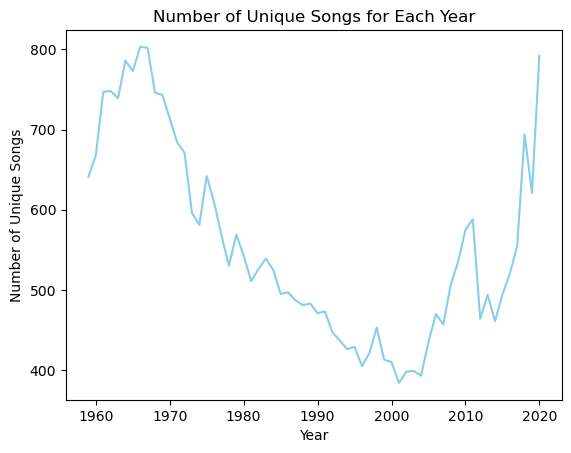

In [6]:
billboard2 = billboard.copy() 
billboard2 = billboard2[~billboard2['year'].isin([1958, 2021])] 

import matplotlib.pyplot as plt

num_of_unique_songs = billboard2.groupby('year')['song'].nunique()

plt.plot(num_of_unique_songs.index, num_of_unique_songs.values, color = 'skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Number of Unique Songs for Each Year')
plt.show()

The graph shows the number of unique songs since 1959 to 2020. The number of unique songs climbed in the 1960s and peaked in the 1970s, followed by a gradual decline until the early 2000s. After an increase until 2010, the number of unique songs dropped in 2011, but has a sharp increase observed starting from around 2014 to 2015.

#### Part C

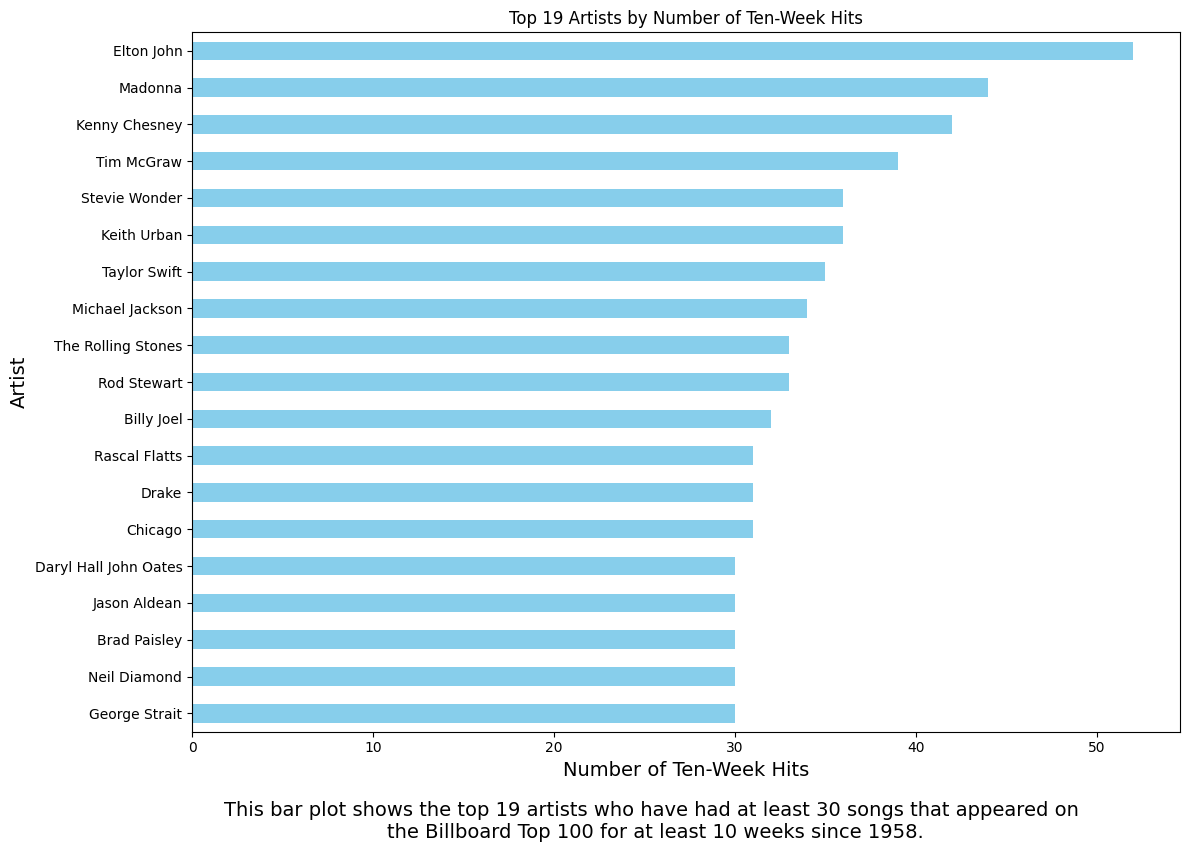

In [11]:
song_counts = billboard.groupby(['song', 'performer']).size()

ten_week_hits = song_counts[song_counts >= 10].reset_index()

artist_counts = ten_week_hits['performer'].value_counts()

top_artists = artist_counts[artist_counts >= 30]

plt.figure(figsize=(12, 8))
top_artists.plot(kind='barh', color = 'skyblue')
plt.xlabel('Number of Ten-Week Hits', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.gca().invert_yaxis()

plt.title('Top 19 Artists by Number of Ten-Week Hits')

caption = '''
This bar plot shows the top 19 artists who have had at least 30 songs that appeared on 
the Billboard Top 100 for at least 10 weeks since 1958.'''
plt.figtext(0.55, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)

plt.tight_layout()
plt.show()


### **Visual story telling part 1: green buildings**

In [12]:
greenbuildings = pd.read_csv('STA380-master/data/greenbuildings.csv')
greenbuildings

CS_PropertyID  cluster     size  empl_gr    Rent  leasing_rate  stories  \
0            379105        1   260300     2.22   38.56         91.39       14   
1            122151        1    67861     2.22   28.57         87.14        5   
2            379839        1   164848     2.22   33.31         88.94       13   
3             94614        1    93372     2.22   35.00         97.04       13   
4            379285        1   174307     2.22   40.69         96.58       16   
...             ...      ...      ...      ...     ...           ...      ...   
7889         157117     1230  1300000     1.15  137.51        100.00       41   
7890         158379     1230    16140     1.15  152.73         75.22        8   
7891          52316     1230    15726     1.15  158.92        100.00        6   
7892         158124     1230    51300     1.15  198.99        100.00       12   
7893         157086     1230  1876972     1.15  250.00         99.84       45   

      age  renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0      16          0        1  ...             1    0          1         4988   
1      27          0        0  ...             0    0          1         4988   
2      36          1        0  ...             0    0          1         4988   
3      46          1        0  ...             0    0          0         4988   
4       5          0        1  ...             0    0          1         4988   
...   ...        ...      ...  ...           ...  ...        ...          ...   
7889   35          0        1  ...             0    0          0         1299   
7890   90          1        0  ...             0    0          0         1299   
7891   67          0        0  ...             0    0          0         1299   
7892   91          0        0  ...             0    0          0         1299   
7893   34          1        1  ...             0    0          1         1299   

      hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0             58         5046          42.57   0.013700           0.029000   
1             58         5046          42.57   0.013731           0.029045   
2             58         5046          42.57   0.013731           0.029045   
3             58         5046          42.57   0.013731           0.029045   
4             58         5046          42.57   0.013731           0.029045   
...          ...          ...            ...        ...                ...   
7889        4796         6095          48.35   0.011757           0.045457   
7890        4796         6095          48.35   0.011757           0.045457   
7891        4796         6095          48.35   0.011757           0.045457   
7892        4796         6095          48.35   0.011757           0.045457   
7893        4796         6095          48.35   0.011757           0.045457   

      cluster_rent  
0            36.78  
1            36.78  
2            36.78  
3            36.78  
4            36.78  
...            ...  
7889         58.72  
7890         58.72  
7891         58.72  
7892         58.72  
7893         58.72  

[7894 rows x 23 columns]

#### Leasing Rate

<Axes: xlabel='leasing_rate', ylabel='Count'>

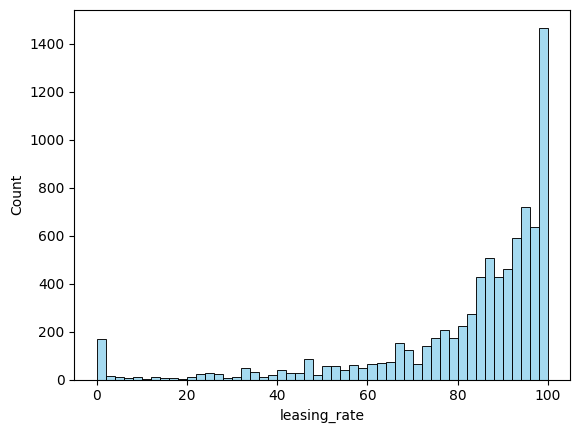

In [13]:
import seaborn as sns
sns.histplot(greenbuildings['leasing_rate'], color='skyblue', bins=50)

<Axes: xlabel='leasing_rate', ylabel='Count'>

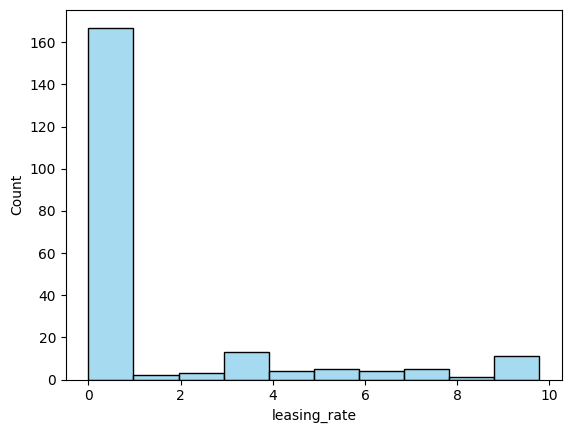

In [14]:
low_occupancy_rate = greenbuildings[greenbuildings['leasing_rate'] < 10]
sns.histplot(low_occupancy_rate['leasing_rate'], color = 'skyblue', bins=10)

We can see that within buildings under 10% of available spaces, most actually have 0% leasing rate, which means that we should not remove all buildings under 10%, as the other buildings under 10% falls in similar pattern with buildings above 10%.

In this case, we should only **remove** buildings that have a **0% leasing rate**.

In [15]:
greenbuildings = greenbuildings[greenbuildings['leasing_rate'] > 0]

#### Rent Median

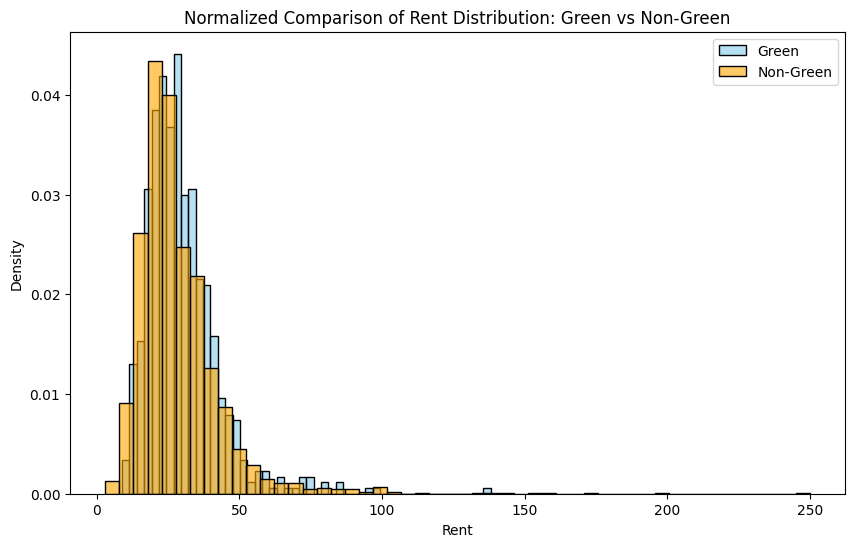

In [16]:
green = greenbuildings[greenbuildings['green_rating'] == 1]
non_green = greenbuildings[greenbuildings['green_rating'] == 0]

plt.figure(figsize=(10, 6))

sns.histplot(green['Rent'], color='skyblue', bins=50, kde=False, stat='density', alpha=0.6, label='Green')
sns.histplot(non_green['Rent'], color='orange', bins=50, kde=False, stat='density', alpha=0.6, label='Non-Green')

plt.xlabel('Rent')
plt.ylabel('Density')
plt.title('Normalized Comparison of Rent Distribution: Green vs Non-Green')
plt.legend()

From this histogram we can see that it is a good decision to use the median instead of mean because both green and non_green rents are skewed to the right, with very few instances of extremely high rent. 

In [17]:
green['Rent'].median(), non_green['Rent'].median()

(27.6, 25.0)

The median for green versus non-green buildings remain the same even though we only remove the 0% leasing rate buildings.

#### Correlations and Confounding Variables

Text(0.5, 1.0, 'Correlation Plot for Variables')

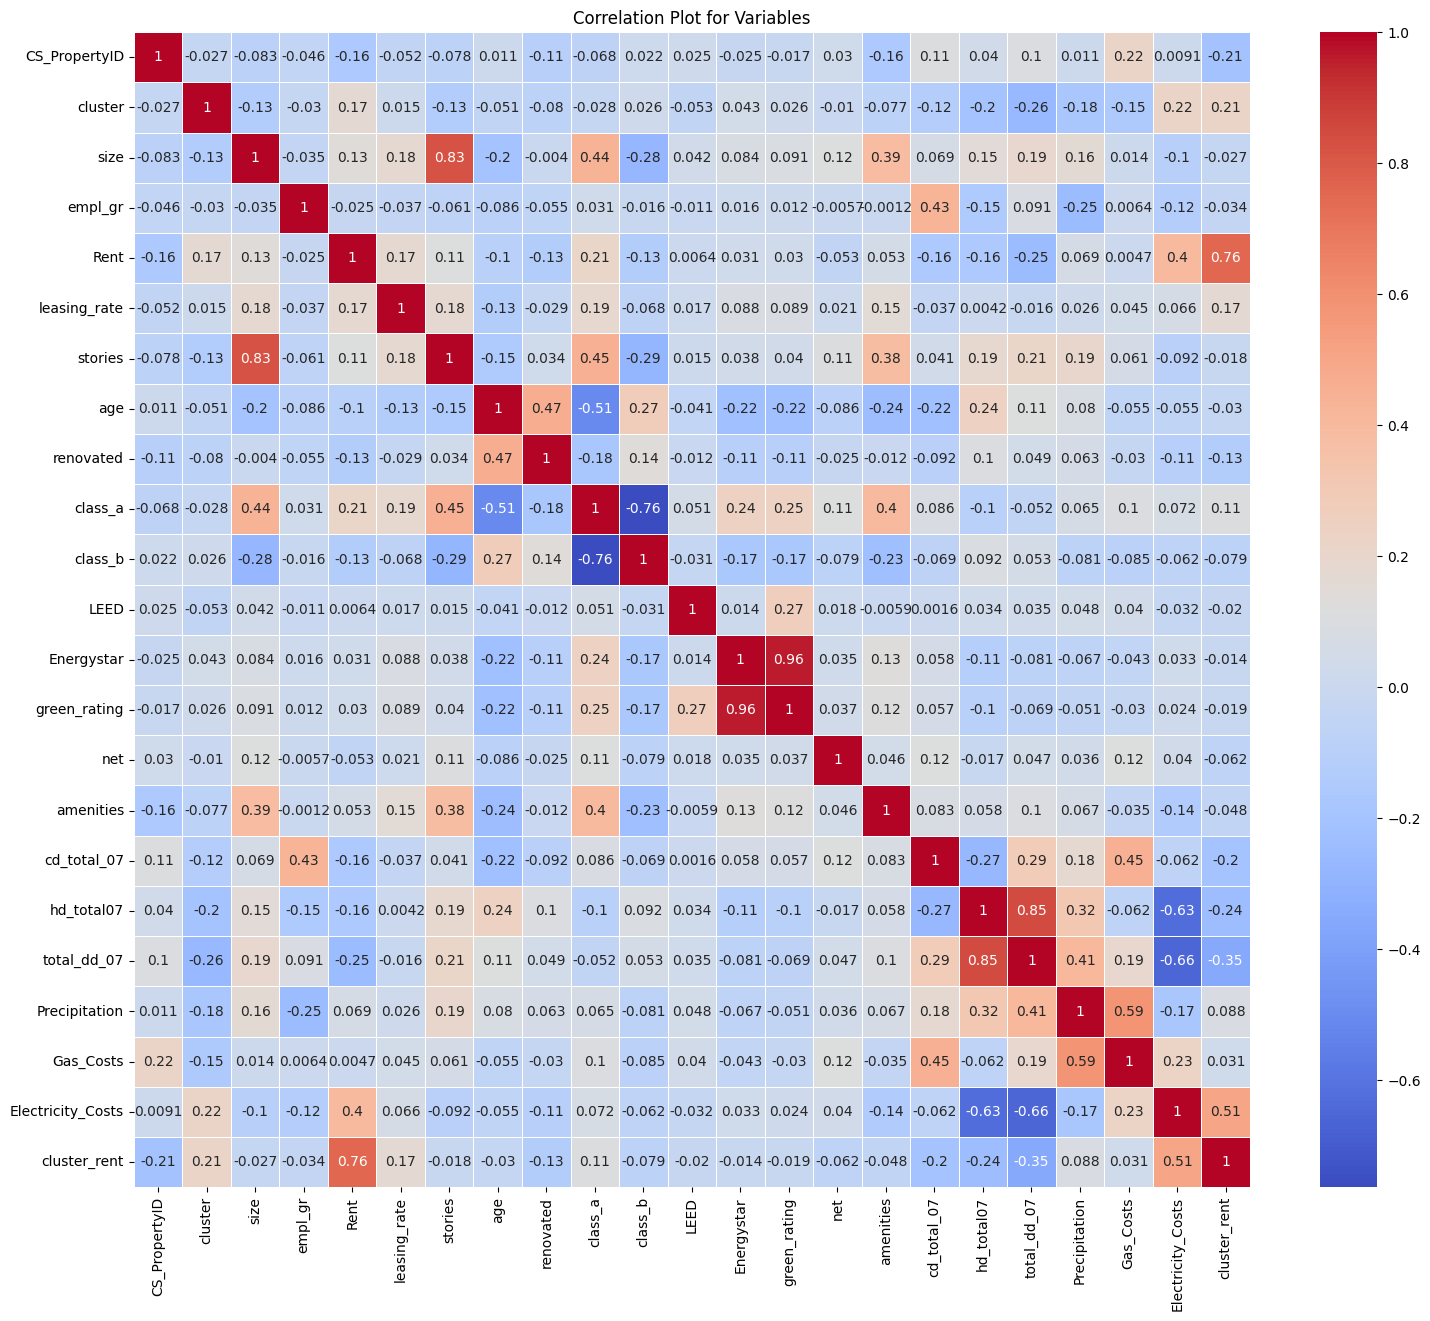

In [18]:
corr_matrix = greenbuildings.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Variables')


However using the correlation heat map, we noticed that Rent has a high correlation with cluster_rent, so let's make a plot to identify potential patterns.

##### Rent vs Cluster

Text(0.5, 1.0, 'Scatter Plot of Rent by Cluster with Median Line')

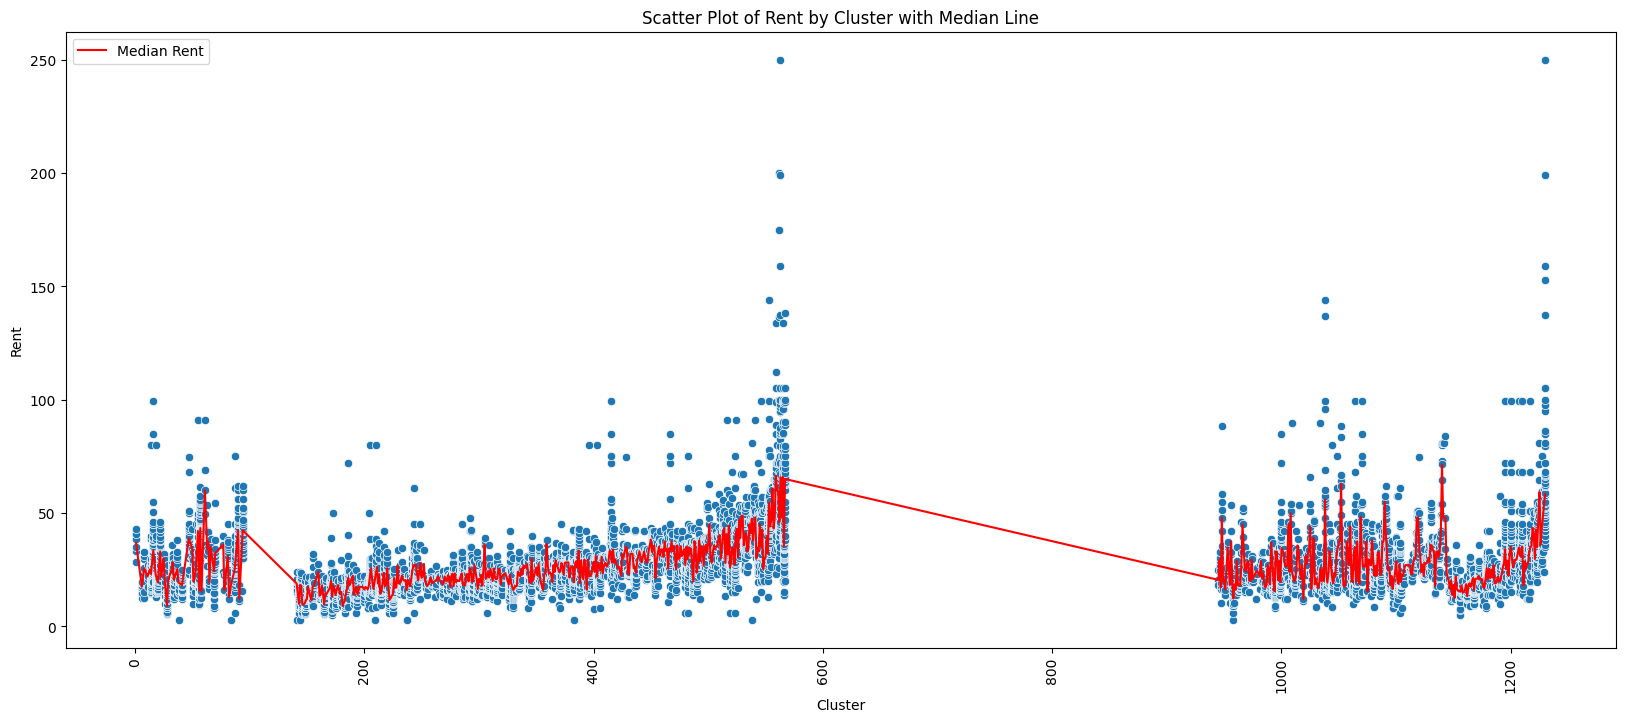

In [19]:
plt.figure(figsize=(20, 8))

sns.scatterplot(x='cluster', y='Rent', data=greenbuildings, legend=None)
median_rent_by_cluster = greenbuildings.groupby('cluster')['Rent'].median().reset_index()

sns.lineplot(x='cluster', y='Rent', data=median_rent_by_cluster, color='red', label='Median Rent')

plt.xticks(rotation=90)
plt.xlabel('Cluster')
plt.ylabel('Rent')
plt.title('Scatter Plot of Rent by Cluster with Median Line')

We can see that the median in rent may vary substaintially from cluster to cluster. Since clusters are formed by close distance, our plot indicates that the location of a building will greatly influence the rent per square feet. 

Thus it will be important if one is trying to compare rent and green status relationship, they should also consider that rent varies with different location.

In our case today, we will not need to worry too much about this issue since we are only analyzing whether our set-location building will be green or not.

##### Class and Green_rating

In [20]:
total_count = len(greenbuildings)

green_count = len(greenbuildings[(greenbuildings['green_rating'] == 1)])
non_green_count = total_count - green_count

class_a_count = len(greenbuildings[(greenbuildings['class_a'] == 1) & (greenbuildings['green_rating'] == 1)])
class_b_count = len(greenbuildings[(greenbuildings['class_b'] == 1) & (greenbuildings['green_rating'] == 1)])
class_c_count = len(greenbuildings[(greenbuildings['class_a'] == 0) & (greenbuildings['class_b'] == 0) & (greenbuildings['green_rating'] == 1)])

nclass_a_count = len(greenbuildings[(greenbuildings['class_a'] == 1) & (greenbuildings['green_rating'] == 0)])
nclass_b_count = len(greenbuildings[(greenbuildings['class_b'] == 1) & (greenbuildings['green_rating'] == 0)])
nclass_c_count = len(greenbuildings[(greenbuildings['class_a'] == 0) & (greenbuildings['class_b'] == 0) & (greenbuildings['green_rating'] == 0)])

class_a_percentage = round((class_a_count / green_count) * 100, 3)
class_b_percentage = round((class_b_count / green_count) * 100, 3)
class_c_percentage = round((class_c_count / green_count) * 100, 3)

nclass_a_percentage = round((nclass_a_count / non_green_count) * 100, 3)
nclass_b_percentage = round((nclass_b_count / non_green_count) * 100, 3)
nclass_c_percentage = round((nclass_c_count / non_green_count) * 100, 3)

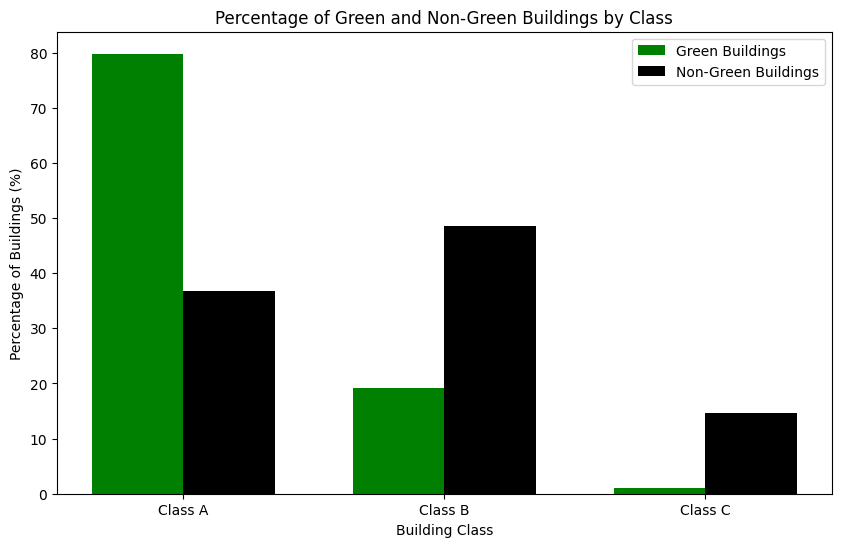

In [21]:
classes = ['Class A', 'Class B', 'Class C']
green_percentages = [class_a_percentage, class_b_percentage, class_c_percentage]
non_green_percentages = [nclass_a_percentage, nclass_b_percentage, nclass_c_percentage]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(classes))

bar1 = ax.bar(index, green_percentages, bar_width, color='green', label='Green Buildings')
bar2 = ax.bar([i + bar_width for i in index], non_green_percentages, bar_width, color='black', label='Non-Green Buildings')

ax.set_xlabel('Building Class')
ax.set_ylabel('Percentage of Buildings (%)')
ax.set_title('Percentage of Green and Non-Green Buildings by Class')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(classes)

ax.legend()


In [22]:
green_filtered = green[green['class_a'] == 1]
non_green_filtered = non_green[non_green['class_a'] == 1]
green_filtered2 = green[green['class_b'] == 1]
non_green_filtered2 = non_green[non_green['class_b'] == 1]
green_filtered3 = green[(green['class_b'] == 0) & (green['class_a'] == 0)]
non_green_filtered3 = non_green[(non_green['class_b'] == 0) & (non_green['class_a'] == 0)]

median_rent_green_class_a = green_filtered['Rent'].median()
median_rent_non_green_class_a = non_green_filtered['Rent'].median()

median_rent_green_class_b = green_filtered2['Rent'].median()
median_rent_non_green_class_b = non_green_filtered2['Rent'].median()

median_rent_green_class_c = green_filtered3['Rent'].median()
median_rent_non_green_class_c = non_green_filtered3['Rent'].median()

Text(0.5, 1.0, 'Median Rent Difference Between Green and Non-Green Buildings by Class')

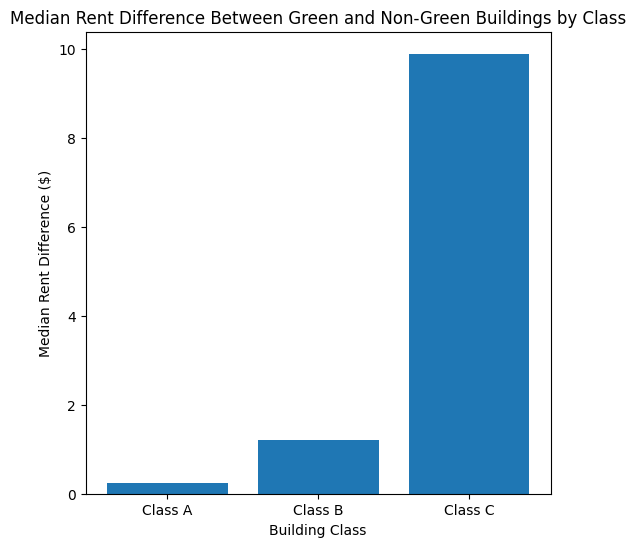

In [23]:
classes = ['Class A', 'Class B', 'Class C']
rent_differences = [
    round(median_rent_green_class_a - median_rent_non_green_class_a, 2),
    round(median_rent_green_class_b - median_rent_non_green_class_b, 2),
    round(median_rent_green_class_c - median_rent_non_green_class_c, 2)
]

plt.figure(figsize=(6, 6))

plt.bar(classes, rent_differences)

plt.xlabel('Building Class')
plt.ylabel('Median Rent Difference ($)')
plt.title('Median Rent Difference Between Green and Non-Green Buildings by Class')

##### **Confounding variables**

We see that green buildings in our dataset is highly biased towards class A, while non-green buildings are more evenly distributed. In the heat map we see that class_a has a positive correlation with Rent prices. Thus if more green compared with non-green buildings are in class_a, that means **the higher median rent prices that we see in green buildings may be due to more class_a buildings.**

**In the analysis for our building, we should first identify what class the building will be, then calculate the time it will take the cost to recuperate. We should not directly take the whole median difference and not take the class into account.**

#### Leasing rates

In [24]:
green['leasing_rate'].median(), non_green['leasing_rate'].median()

(92.92500000000001, 89.41499999999999)

From the leasing rate of green buildings, we can see that the staff's analysis using 90% leasing rate is reasonable. 

In [25]:
percentage = greenbuildings.groupby('green_rating')['net'].value_counts(normalize=True)
print(percentage)

green_rating  net
0             0      0.966846
              1      0.033154
1             0      0.942982
              1      0.057018
Name: proportion, dtype: float64


#### Utility (Net) vs Rent

Text(0.5, 1.0, 'Number of Total Degree Days by Green Rating')

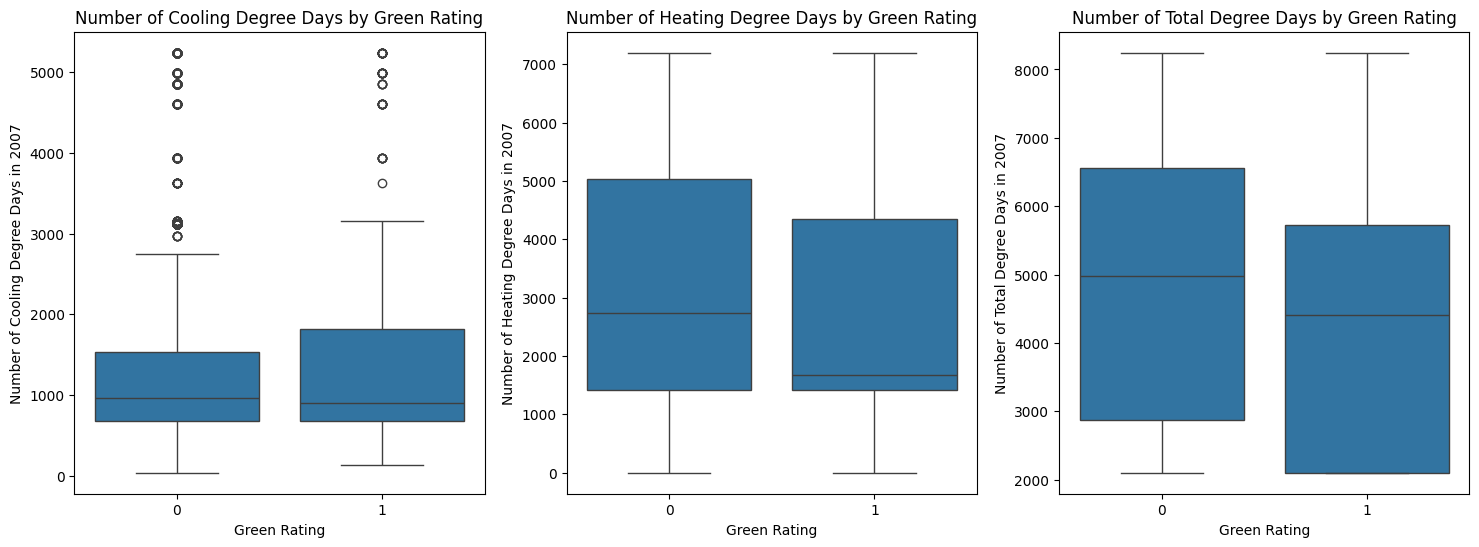

In [26]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='green_rating', y='cd_total_07', data=greenbuildings)
plt.xlabel('Green Rating')
plt.ylabel('Number of Cooling Degree Days in 2007')
plt.title('Number of Cooling Degree Days by Green Rating')

plt.subplot(1, 3, 2)
sns.boxplot(x='green_rating', y='hd_total07', data=greenbuildings)
plt.xlabel('Green Rating')
plt.ylabel('Number of Heating Degree Days in 2007')
plt.title('Number of Heating Degree Days by Green Rating')

plt.subplot(1, 3, 3)
sns.boxplot(x='green_rating', y='total_dd_07', data=greenbuildings)
plt.xlabel('Green Rating')
plt.ylabel('Number of Total Degree Days in 2007')
plt.title('Number of Total Degree Days by Green Rating')


From the net percentages by green versus non-green buildings and the boxplots for degree days, we can conclude that more non-green buildings are not on net-contract basis, meaning utility costs are included in rent. In addition, non-green buildings tend to have more degree days, causing higher utility costs. 

Adding these two aspects, this means that: 

**After building owners pay the utility costs for non-net tenants, the differnece of remaining earnings between non-green and green buildings will be even larger than only comparing rent medians.**

#### Conclusion

We should understand the importance of class before deciding whether the building will go green, as the difference in median rent varies greatly among class, thus creating variation in the time that takes to recuperate the additional cost of a green building. Once the class of the building is set, it is easier to compare the median of non-green vs green buildings in the class to decide the recuperate time.

### **Visual story telling part 2: Capital Metro data**

In [27]:
capmetro = pd.read_csv('STA380-master/data/capmetro_UT.csv')
capmetro

timestamp  boarding  alighting day_of_week  temperature  \
0     2018-09-01 06:00:00         0          1         Sat        74.82   
1     2018-09-01 06:15:00         2          1         Sat        74.82   
2     2018-09-01 06:30:00         3          4         Sat        74.82   
3     2018-09-01 06:45:00         3          4         Sat        74.82   
4     2018-09-01 07:00:00         2          4         Sat        74.39   
...                   ...       ...        ...         ...          ...   
5819  2018-11-30 20:45:00        43         29         Fri        70.73   
5820  2018-11-30 21:00:00        24         19         Fri        69.88   
5821  2018-11-30 21:15:00        33         16         Fri        69.88   
5822  2018-11-30 21:30:00        25         15         Fri        69.88   
5823  2018-11-30 21:45:00        21         13         Fri        69.88   

      hour_of_day month  weekend  
0               6   Sep  weekend  
1               6   Sep  weekend  
2               6   Sep  weekend  
3               6   Sep  weekend  
4               7   Sep  weekend  
...           ...   ...      ...  
5819           20   Nov  weekday  
5820           21   Nov  weekday  
5821           21   Nov  weekday  
5822           21   Nov  weekday  
5823           21   Nov  weekday  

[5824 rows x 8 columns]

#### Day of Week + Boarding + Alighting + Hour of Day

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


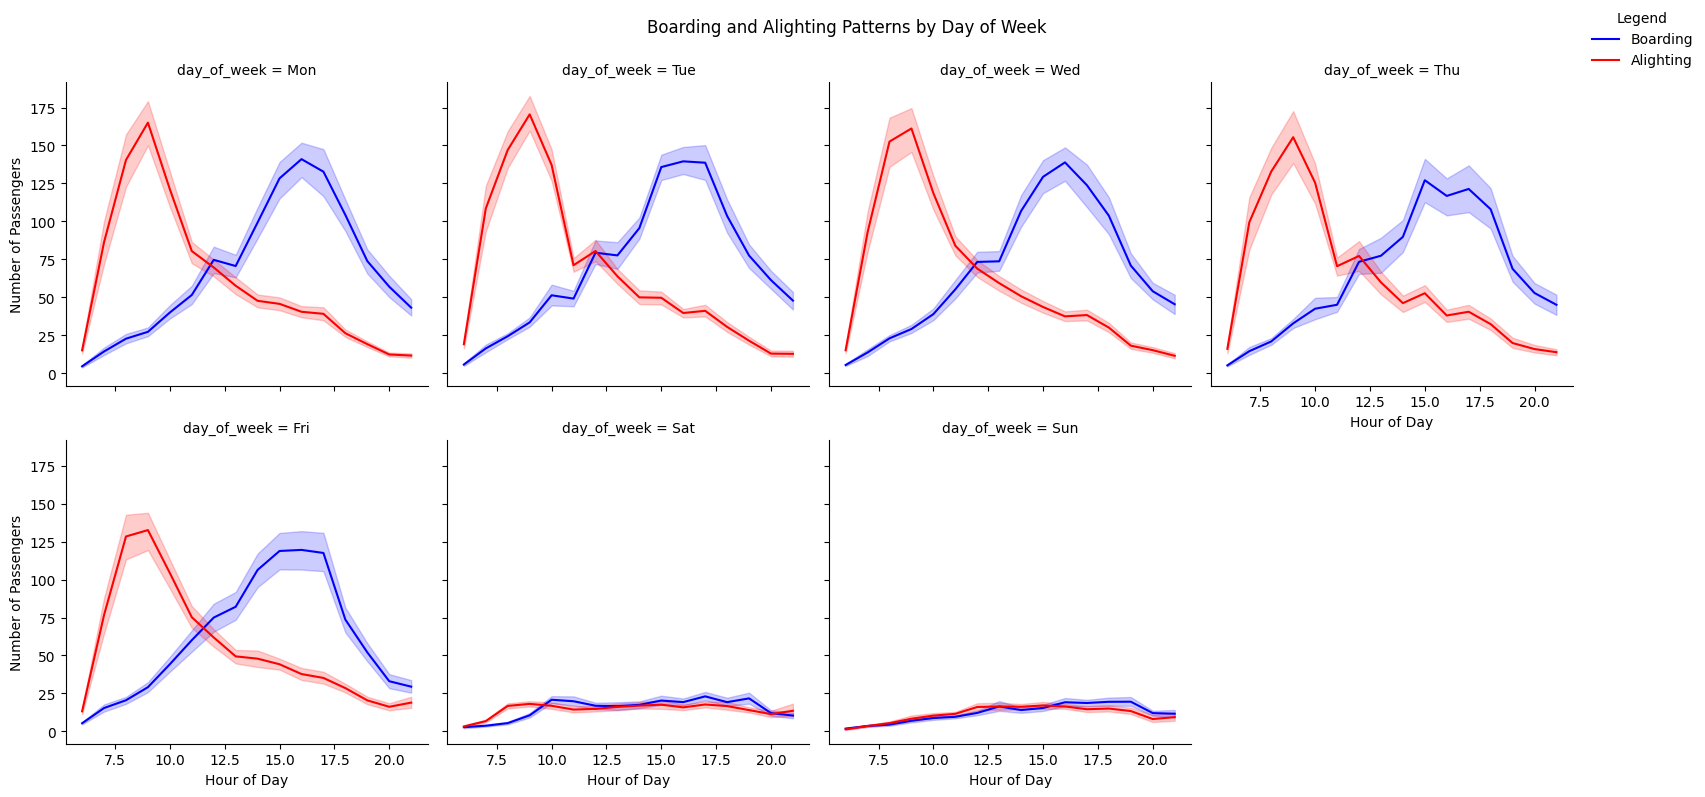

In [28]:
capmetro['timestamp'] = pd.to_datetime(capmetro['timestamp'])

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sns.FacetGrid(capmetro, col='day_of_week', col_wrap=4, height=4, col_order=day_order)

g.map(sns.lineplot, 'hour_of_day', 'boarding', color='blue', label='Boarding')
g.map(sns.lineplot, 'hour_of_day', 'alighting', color='red', label='Alighting')

g.set_axis_labels('Hour of Day', 'Number of Passengers')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Boarding and Alighting Patterns by Day of Week')

handles, labels = g.axes.flatten()[0].get_legend_handles_labels()
g.add_legend(handles=handles, labels=labels, title='Legend', loc='upper right')

The above graph shows the CapMetro boarding and alighting patterns throughout the day by day of week. We can see that most people get off the station at the morning, indicating students coming to school, and most people get on the station during the afternoon, indicating the end of a school day. On the weekends, however, there are no significant difference in boarding and alighting as both numbers fall significantly compared with weekdays.

#### Weekend + Boarding + Alighting + Hour of Day

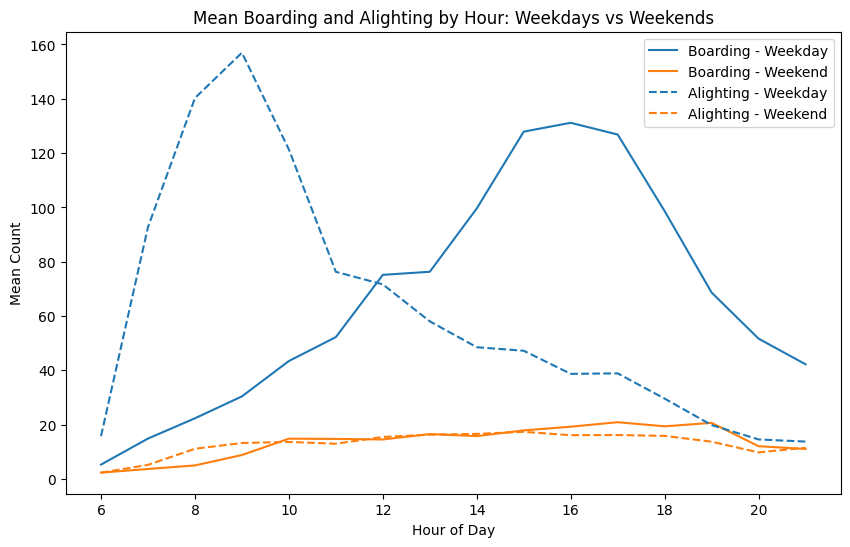

In [29]:
mean_data = capmetro.groupby(['weekend', 'hour_of_day'])[['boarding', 'alighting']].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=mean_data, x='hour_of_day', y='boarding', hue='weekend')
sns.lineplot(data=mean_data, x='hour_of_day', y='alighting', hue='weekend', linestyle='--')

plt.title('Mean Boarding and Alighting by Hour: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Count')

handles1, labels1 = plt.gca().get_legend_handles_labels()
new_labels = ['Boarding - Weekday', 'Boarding - Weekend', 'Alighting - Weekday', 'Alighting - Weekend']

plt.legend(handles1[:4], new_labels, loc='upper right')

For this graph we used the mean boarding and alighting number by hour to compare between weekend and weekday performance since we saw a big difference in the former graph, in this graph we can clealy see the difference in performance comparing the blue (weekday) lines with the orange (weekend) lines.

#### Temperature (Bins) + Mean Boarding + Mean Alighting

<Axes: ylabel='Frequency'>

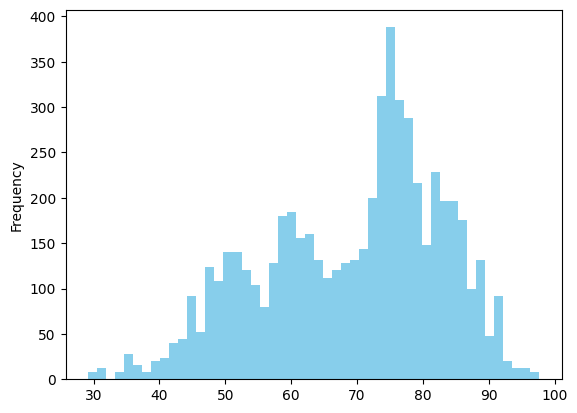

In [30]:
capmetro['temperature'].plot(kind='hist', bins=50, color='skyblue')

Text(0.5, 1.0, 'Temperature Over Time')

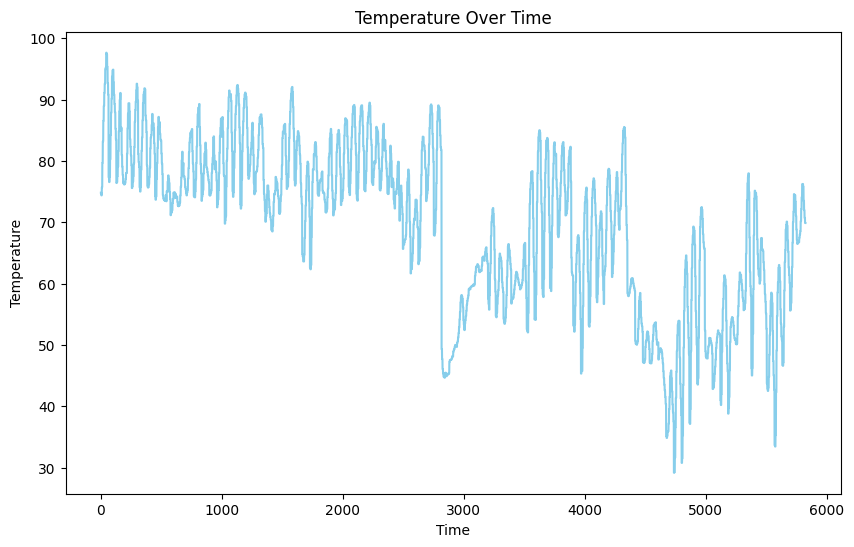

In [31]:
temperature = capmetro['temperature']
time = capmetro.index

plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=temperature, color='skyblue')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')



We used a histogram to first identify the distribution of temperatures throughout the dataset, and took a look at how the temperature changed throughout the semester. We decide to create 6 different bins for different temperature intervals (below).

/var/folders/58/h00hbzkx5b118jdjbxyz7fc00000gn/T/ipykernel_16649/1230795329.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_boarding = daily_data.groupby('temp_bins')['boarding'].mean().sort_index()
/var/folders/58/h00hbzkx5b118jdjbxyz7fc00000gn/T/ipykernel_16649/1230795329.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_alighting = daily_data.groupby('temp_bins')['alighting'].mean().sort_index()


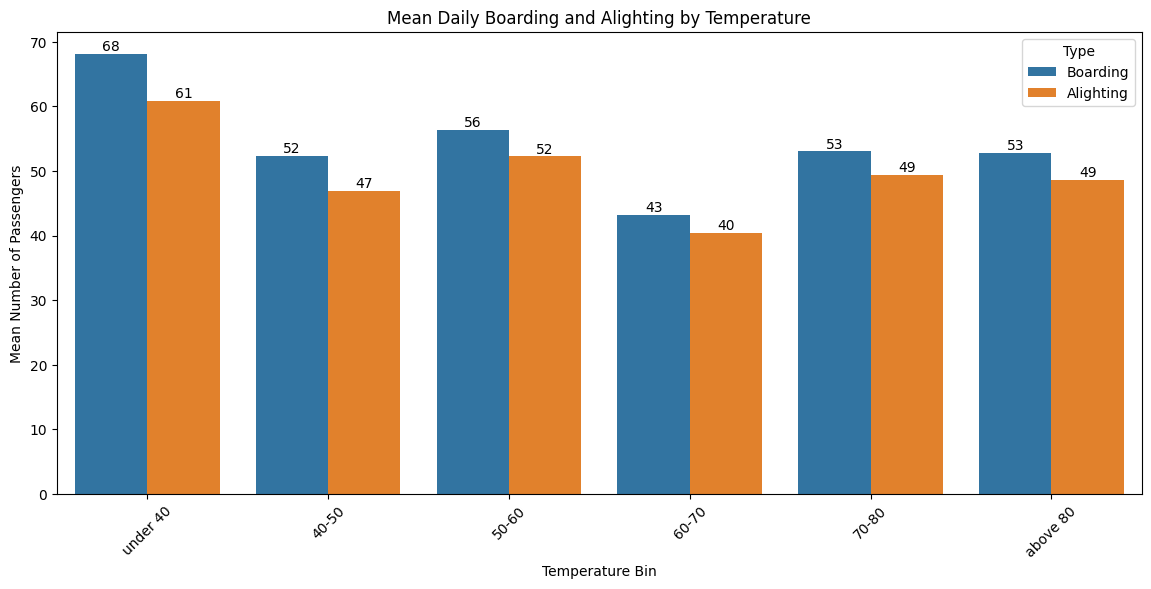

In [32]:
daily_data = capmetro.groupby(capmetro['timestamp'].dt.date).agg({
    'temperature': 'mean',
    'boarding': 'mean',
    'alighting': 'mean'
}).reset_index()

bins = [-float('inf'), 40, 50, 60, 70, 80, float('inf')]
labels = ['under 40', '40-50', '50-60', '60-70', '70-80', 'above 80']
daily_data['temp_bins'] = pd.cut(daily_data['temperature'], bins=bins, labels=labels)

mean_boarding = daily_data.groupby('temp_bins')['boarding'].mean().sort_index()
mean_alighting = daily_data.groupby('temp_bins')['alighting'].mean().sort_index()

plot_data = pd.DataFrame({
    'Temperature': mean_boarding.index,
    'Boarding': mean_boarding.values,
    'Alighting': mean_alighting.values
})

plot_data_melted = pd.melt(plot_data, id_vars=['Temperature'], var_name='Type', value_name='Mean')

plt.figure(figsize=(14, 6))
sns.barplot(x='Temperature', y='Mean', hue='Type', data=plot_data_melted)

plt.title('Mean Daily Boarding and Alighting by Temperature')
plt.xlabel('Temperature Bin')
plt.ylabel('Mean Number of Passengers')

plt.xticks(rotation=45)

for i, typ in enumerate(['Boarding', 'Alighting']):
    for j, v in enumerate(plot_data[typ]):
        plt.text(j + (i-0.5)*0.4, v, f'{v:.0f}', ha='center', va='bottom')

plt.legend(title='Type')

From the above graph we can see the mean daily boarding and alighting by temperature bins. It shows a mild correlation with more people tend to ride the bus when temperatures are lower.




#### Month + Mean Boarding + Mean Alighting (with further discussion on Thanksgiving)

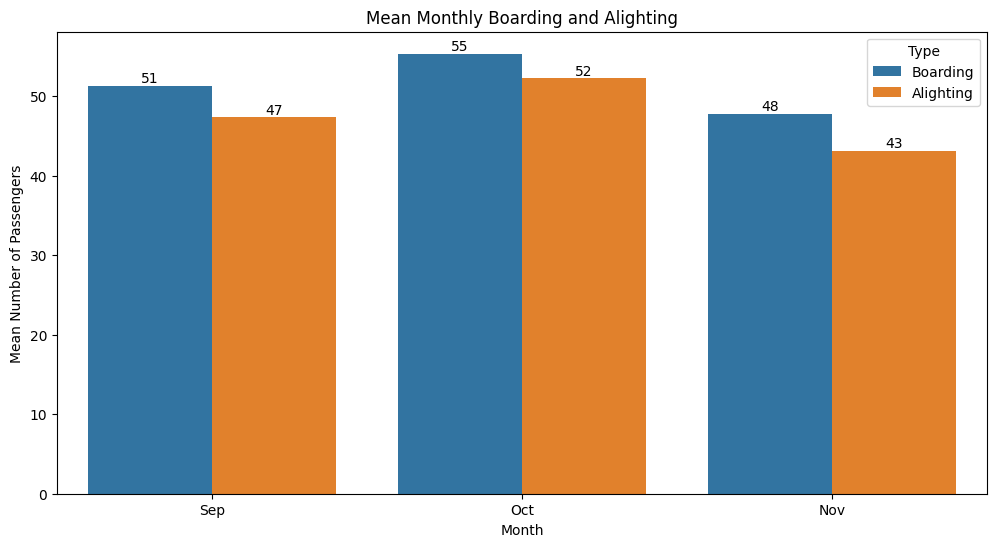

In [33]:
monthly_data = capmetro.groupby('month').agg({
    'boarding': 'mean',
    'alighting': 'mean'
}).reset_index()

month_order = ['Sep', 'Oct', 'Nov']

monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('month')

plot_data = pd.DataFrame({
    'Month': monthly_data['month'],
    'Boarding': monthly_data['boarding'],
    'Alighting': monthly_data['alighting']
})

plot_data_melted = pd.melt(plot_data, id_vars=['Month'], var_name='Type', value_name='Mean')

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Mean', hue='Type', data=plot_data_melted)

plt.title('Mean Monthly Boarding and Alighting')
plt.xlabel('Month')
plt.ylabel('Mean Number of Passengers')

for i, typ in enumerate(['Boarding', 'Alighting']):
    for j, v in enumerate(plot_data[typ]):
        plt.text(j + (i-0.5)*0.4, v, f'{v:.0f}', ha='center', va='bottom')

plt.legend(title='Type')

From this graph we see that more students board and alight the station in October compared with the other two months, but the difference are not by a lot, and the least students board and alight in November. We then thought that the decrease in November may be caused by a gap in Thanksgiving holiday, which is discussed in the below graph.

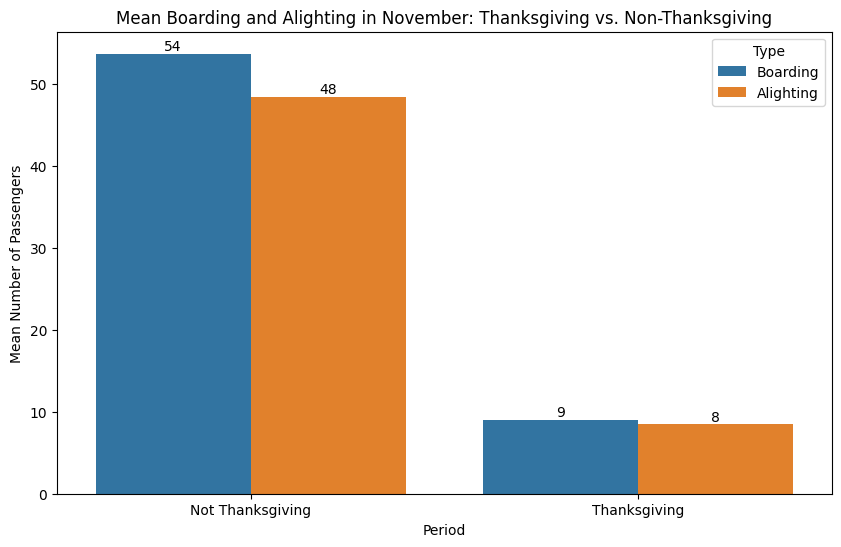

In [34]:
november_data = capmetro[capmetro['month'] == 'Nov'].copy()

november_data['is_thanksgiving'] = november_data['timestamp'].dt.day.between(21, 24)
november_data['period'] = november_data['is_thanksgiving'].map({True: 'Thanksgiving', False: 'Not Thanksgiving'})

mean_data = november_data.groupby('period').agg({
    'boarding': 'mean',
    'alighting': 'mean'
}).reset_index()

plot_data = pd.DataFrame({
    'Period': mean_data['period'],
    'Boarding': mean_data['boarding'],
    'Alighting': mean_data['alighting']
})

plot_data_melted = pd.melt(plot_data, id_vars=['Period'], var_name='Type', value_name='Mean')

plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Mean', hue='Type', data=plot_data_melted)

plt.title('Mean Boarding and Alighting in November: Thanksgiving vs. Non-Thanksgiving')
plt.xlabel('Period')
plt.ylabel('Mean Number of Passengers')

for i, typ in enumerate(['Boarding', 'Alighting']):
    for j, v in enumerate(plot_data[typ]):
        plt.text(j + (i-0.5)*0.4, v, f'{v:.0f}', ha='center', va='bottom')

plt.legend(title='Type')

Wow! There is a huge difference between boarding/alighting comparing Thanksgiving with regular days in November. If discounting Thanksgiving, the regular days has a pretty similar boarding/alighting number compared with September and October.

### **Clustering and dimensionality reduction**

In [35]:
wine = pd.read_csv('STA380-master/data/wine.csv')
wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#### PCA

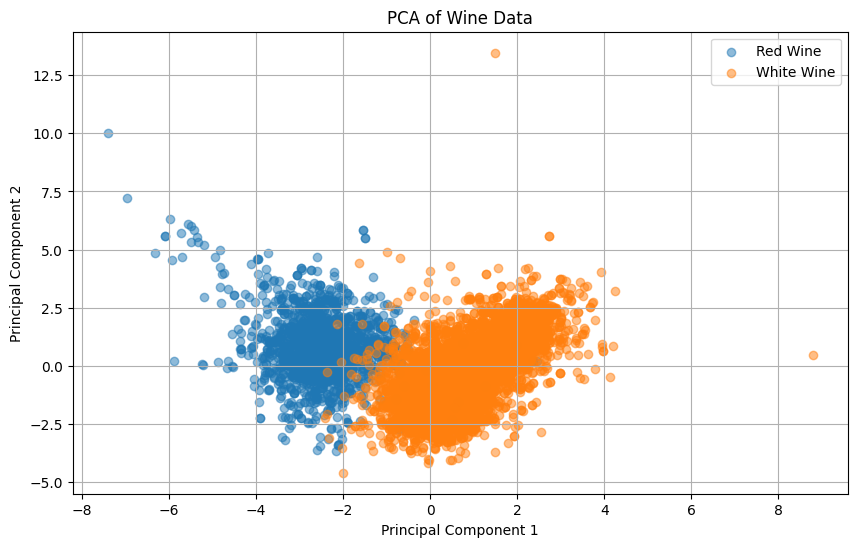

In [37]:
X = wine.drop(['quality', 'color'], axis=1)
y_color = wine['color']
y_quality = wine['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for color, label in zip(['red', 'white'], ['Red Wine', 'White Wine']):
    plt.scatter(X_pca[y_color == color, 0], X_pca[y_color == color, 1], label=label, alpha=0.5)
plt.title('PCA of Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

From the PCA plot we can see the wines projected onto the first two principal components. There are some separation between red and white wines, meaning that PCA can distinguish between red and white wines using their chemical properties; however we can see there are some overlapping in the middle, indicating that PCA alone may not be able to fully capture the difference between the two wines.

#### tSNE

##### Original model

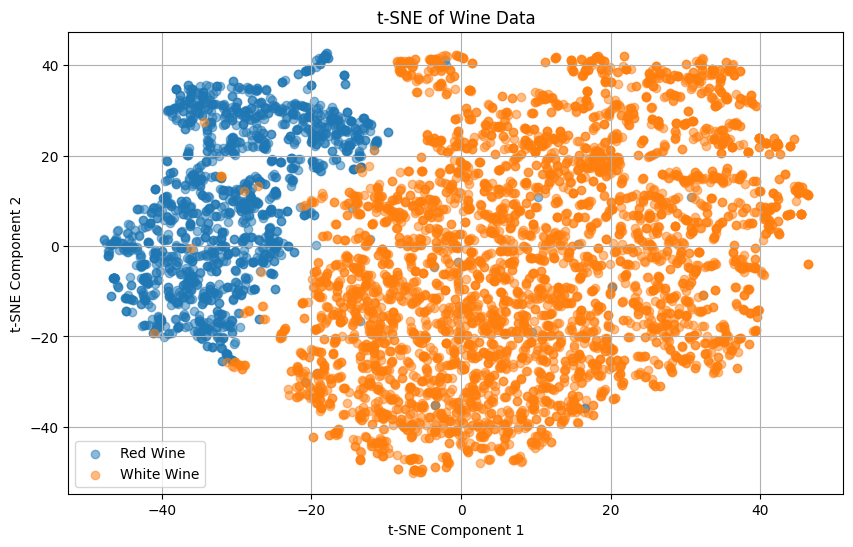

In [38]:
tsne_orig = TSNE(n_components=2, perplexity=30, n_iter=500, learning_rate=200)
X_tsne_orig = tsne_orig.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for color, label in zip(['red', 'white'], ['Red Wine', 'White Wine']):
    plt.scatter(X_tsne_orig[y_color == color, 0], X_tsne_orig[y_color == color, 1], label=label, alpha=0.5)
plt.title('t-SNE of Wine Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

The t-SNE plot shows two clusters, corresponding to the two wine types. From this original parameter model, we can see that there are some orange dots in the blue cluster and vice versa.

Since perplexity and learning rate are two parameters that we can adjust, we will be trying out different combinations to see if a clearer seperation appears.

##### Lower perplexity to 5

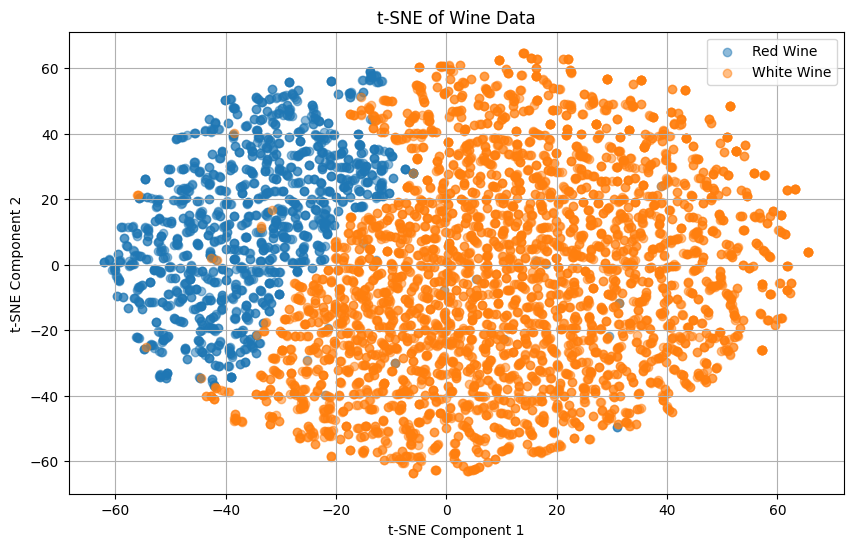

In [39]:
tsne_p5 = TSNE(n_components=2, perplexity=5, n_iter=500, learning_rate=200)
X_tsne_p5 = tsne_p5.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for color, label in zip(['red', 'white'], ['Red Wine', 'White Wine']):
    plt.scatter(X_tsne_p5[y_color == color, 0], X_tsne_p5[y_color == color, 1], label=label, alpha=0.5)
plt.title('t-SNE of Wine Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

Lowering the perplexity seemed to improve some performance, and it makes sense since perplexity controls the balance between local and global aspects of the data, and in our orignial model we see that the orange cluster is more spread out, changing the perplexity to 5 allows the model to focus more on local structure, and the model has a clearer line between clusters. But for the accuracy of the clusters we will have to use our cluster model to understand.

##### Raise learning rate to 1000

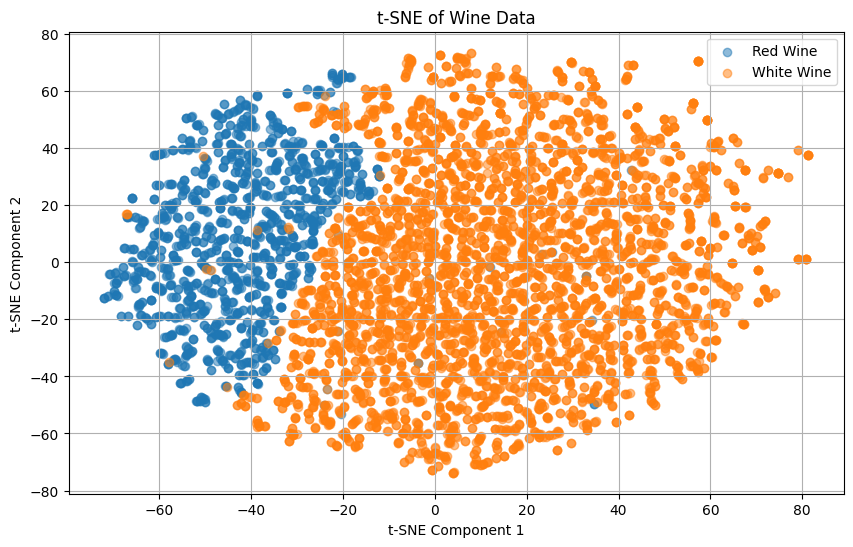

In [40]:
tsne_lr1000 = TSNE(n_components=2, perplexity=5, n_iter=500, learning_rate=1000)
X_tsne_lr1000 = tsne_lr1000.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for color, label in zip(['red', 'white'], ['Red Wine', 'White Wine']):
    plt.scatter(X_tsne_lr1000[y_color == color, 0], X_tsne_lr1000[y_color == color, 1], label=label, alpha=0.5)
plt.title('t-SNE of Wine Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

By raising the learning rate we did not really see any significant changes in the model, so we should stay with learning rate = 200 as in the previous model.

#### K-means Clustering

##### K-means with PCA

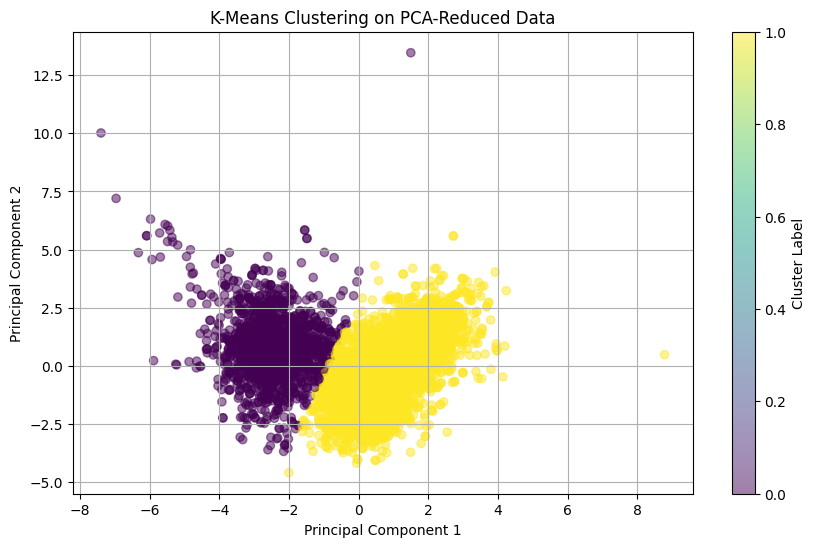

color   red  white
row_0             
0      1572     85
1        27   4813

In [41]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

pd.crosstab(clusters, y_color)


##### K-means with tSNE

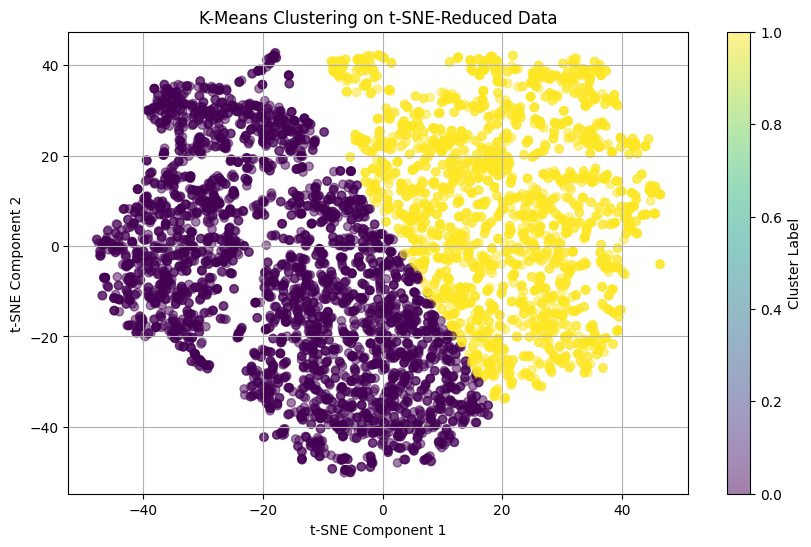

color   red  white
row_0             
0      1591   2117
1         8   2781

In [42]:
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne_orig)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_orig[:, 0], X_tsne_orig[:, 1], c=clusters_tsne, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering on t-SNE-Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

cluster_vs_color_tsne = pd.crosstab(clusters_tsne, y_color)
cluster_vs_color_tsne

After putting our all three of our tSNE models into the K-means clustering, we see that the oringinal tSNE with a perplexity of 20 and LR of 200 performs the best in terms of the confusion matrix; however, it is still way worse compared to PCA and also using K-means on the unaltered orignial data, with a large number of white wine categorized as red.

#### Conclusion

Using a confusion matrix is a good way to interpret how a clustering model has done, and in our case we want to compare which dimensionality reduction technique is more suitable in our dataset. 

When we look at the plots, we can see that the tSNE is doing a good job at creating clusters that do not overlap with each other; however, when we look into the confusion matrix, there are 1591 red wines and 2117 white wines in the same cluster, meaning that the 1591 red wines are misclassified dispite the distinct visual separation. 

Our PCA model, despite having a less distinct visual separation, resulted in drastic fewer misclassification cases, with only 85 white wines and 27 red wines classified wrong.

**PCA combined with K-Means is likely the more reliable choice, given the lower number of misclassifications**

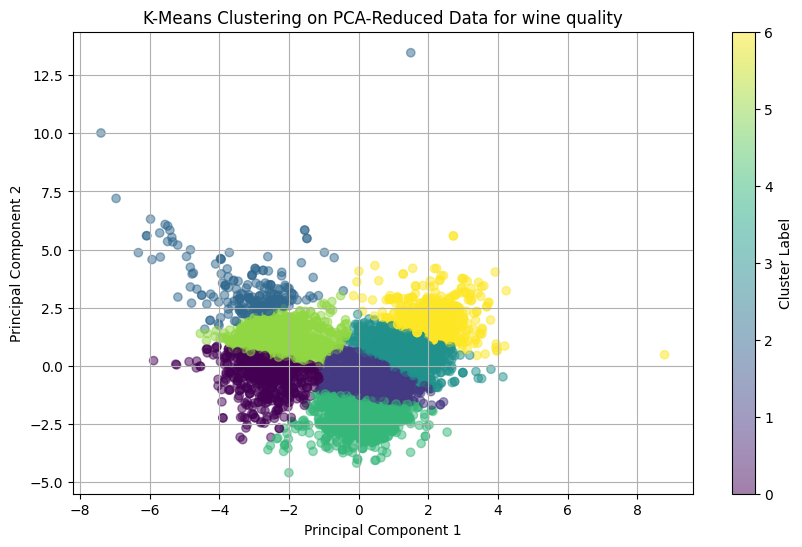

quality  3   4    5    6    7   8  9
row_0                               
0        7  36  229  279   99   8  0
1        3  76  491  763  277  58  0
2        4   6   87   96   22   1  0
3        6  20  452  527   81  13  1
4        4  28  118  562  439  89  4
5        1  31  390  266   71   7  0
6        5  19  371  343   90  17  0


In [59]:
X = wine.drop(['quality', 'color'], axis=1)
y_quality = wine['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering on PCA-Reduced Data for wine quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

cluster_vs_quality = pd.crosstab(clusters, y_quality)
print(cluster_vs_quality)


The K-means clustering using PCA can group wines into clustering that somewhat reflects the quality ratings, but there are significant overlap. However, we should note that the quality are all continuous, so being able to identify similar qualities into the same cluster that are actually in nearby qualities can still be beneficial. 

### **Market Segmentation**

In [7]:
sm = pd.read_csv('STA380-master/data/social_marketing.csv')
sm.head()

Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  personal_fitness  fashion  small_business  spam  adult  
0       1       0                11        0               0     0      0  
1       1       4                 0        0               0     0      0  
2       1       0                 0        1               0     0      0  
3       0       0                 0        0               0     0      0  
4       0       0                 0        0               1     0      0  

[5 rows x 37 columns]

In [8]:
sm.describe()

chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.160917     3.031113     1.775557     1.132562  ...   
min       0.000000       0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000       0.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000       1.000000     1.000000     1.000000     1.000000  ...   
75%       1.000000       2.000000     2.000000     2.000000     1.000000  ...   
max      17.000000      20.000000    37.000000    16.000000    10.000000  ...   

          religion       beauty    parenting       dating       school  \
count  7882.000000  7882.000000  7882.000000  7882.000000  7882.000000   
mean      1.095407     0.705151     0.921340     0.710860     0.767699   
std       1.914829     1.327903     1.515359     1.782347     1.188259   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max      20.000000    14.000000    14.000000    24.000000    11.000000   

       personal_fitness      fashion  small_business         spam        adult  
count       7882.000000  7882.000000     7882.000000  7882.000000  7882.000000  
mean           1.462065     0.996574        0.336336     0.006470     0.403324  
std            2.405244     1.828412        0.618147     0.083288     1.813428  
min            0.000000     0.000000        0.000000     0.000000     0.000000  
25%            0.000000     0.000000        0.000000     0.000000     0.000000  
50%            0.000000     0.000000        0.000000     0.000000     0.000000  
75%            2.000000     1.000000        1.000000     0.000000     0.000000  
max           19.000000    18.000000        6.000000     2.000000    26.000000  

[8 rows x 36 columns]

Drop the user ID column and make sure everything eles is all floats and intervals

In [9]:
sm1= sm.drop(['Unnamed: 0'], axis=1)
numeric_columns = sm1.select_dtypes(include=[float, int]).columns
sm_numeric = sm1[numeric_columns]

Scale the data and plot the within-cluster sum of squares against the number of clusters to see what number of cluster we should use by looking at the elbow point.

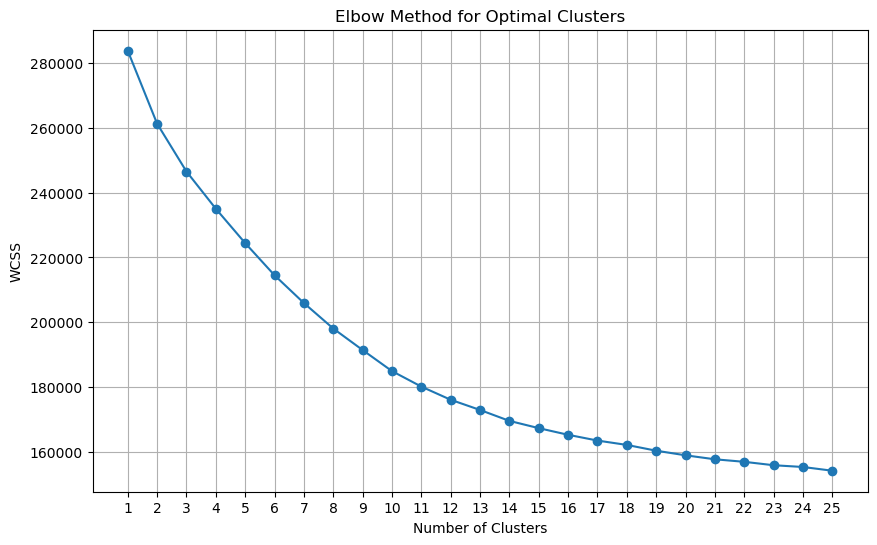

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sm_numeric)

wcss = []
for i in range(1, 26):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 26))
plt.grid(True)
plt.show()

In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

sm['Cluster'] = clusters

Since our elbow point is not very clear, we can use Silhouette score and Davis Bouldin index to identify whether the number of cluster is good.

In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.17952780144013672


In [15]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_data, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 3.046100321130662


After comparing, we decided to use 3 as our number of clusters, as 3 has the second most silhouette score, and the least Bavis-Bouldin index.

Now plot the clusters.

Text(0, 0.5, 'PCA Component 2')

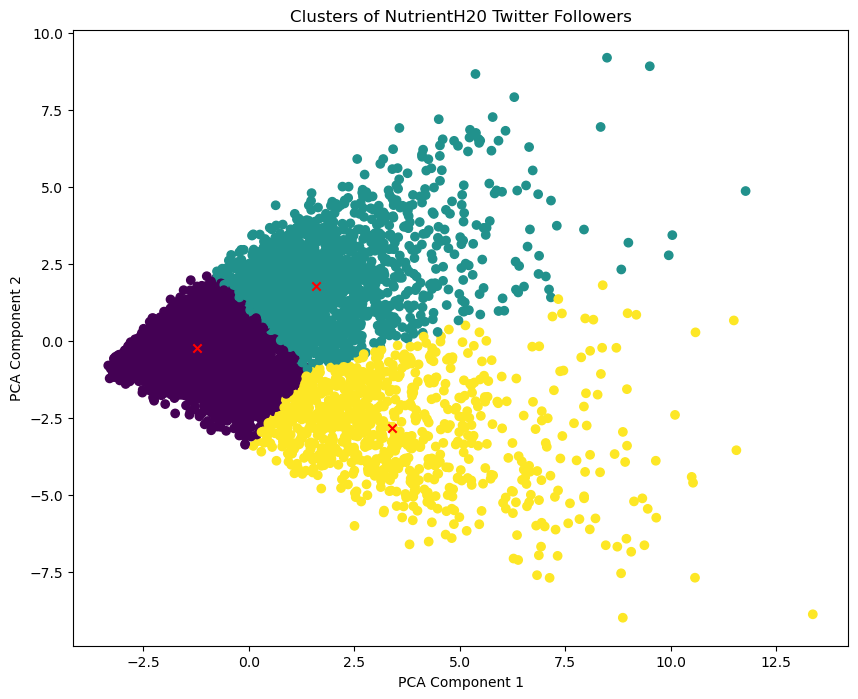

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('Clusters of NutrientH20 Twitter Followers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Take a look at the cluster summary and identify patterns of users in the same cluster.

In [22]:
print("\nCluster Summary (Transposed):")
print(cluster_summary.transpose())


Cluster Summary (Transposed):
Cluster                  0         1         2
chatter           3.618302  6.460669  4.046243
current_events    1.361429  1.855949  1.700578
travel            1.279952  2.252704  1.772254
photo_sharing     1.846077  4.898722  2.419653
uncategorized     0.670881  1.192232  0.739884
tv_film           0.836243  1.621927  1.121387
sports_fandom     0.994782  1.282694  5.778035
politics          1.386715  2.629794  2.126012
food              0.830825  1.508358  4.401156
family            0.568533  0.912979  2.449711
home_and_garden   0.410997  0.721239  0.680925
music             0.482440  1.142085  0.724855
news              0.962673  1.567847  1.752601
online_gaming     0.914108  1.908555  1.261272
shopping          0.954044  2.498525  1.289017
health_nutrition  1.697371  4.827434  2.263584
college_uni       1.127433  2.606686  1.494798
sports_playing    0.454746  1.030482  0.781503
cooking           0.951435  4.720747  1.626590
eco               0.362232  0

Despite the data itself has some noise and we did not find a obvious elbow point, we still can identify some patterns within different groups of audience.

**Patterns and insights**

In Cluster 0, we can see that the users have broad but moderate interests, suggesting that this group have more generalized consumers with no strong interest area.

In Cluster 1, users have diverse interests with emphasis on photo/social aspects (photo-sharing, shopping), and also health aspects (health_nutrition). **This cluster can be key when targeting towards active and health-conscious consumers.** 

In Cluster 2, users are highly involved in sports fandom, family (family and parenting), food (food and cooking), religion, and has a low spam number (0.007). **NutrientH2O could target this segment with family-oriented, sports-related, and culinary content (all family related topics) to resonate with their interests.**


### **The Reuters corpus**

In [55]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [66]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/chiaolin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chiaolin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chiaolin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

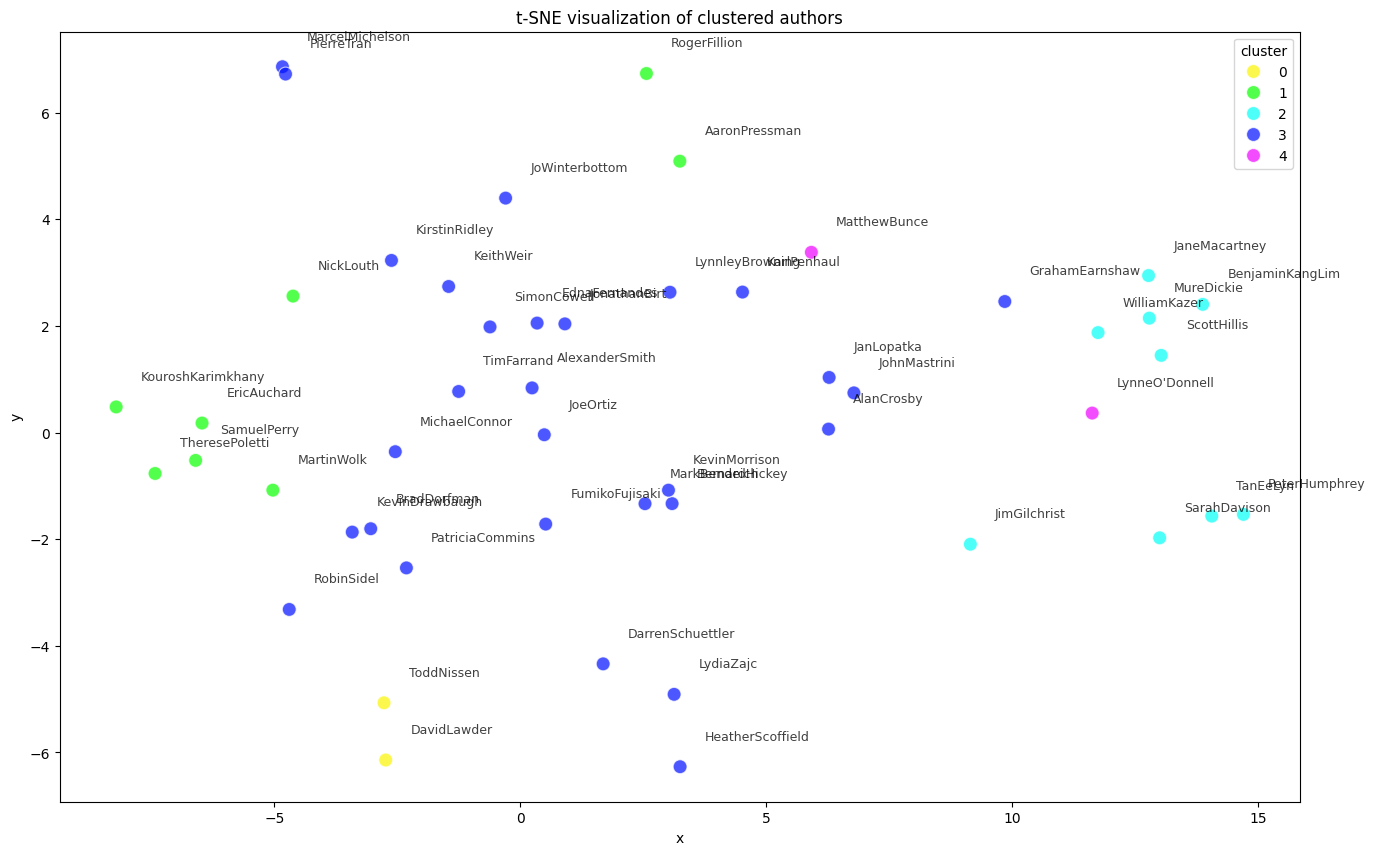

In [67]:
stop_words = set(stopwords.words('english')).union({"said", "mr", "mrs", "one", "two", "would", "could"})
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

train_texts, train_labels = read_data_from_directory("STA380-master/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("STA380-master/data/ReutersC50/C50test")

train_texts = [' '.join(preprocess_text(text)) for text in train_texts]
test_texts = [' '.join(preprocess_text(text)) for text in test_texts]

vectorizer = CountVectorizer(max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

pca = PCA(n_components=100)
train_pca = pca.fit_transform(train_dtm.toarray())

author_pca_avg = {}

for author in set(train_labels):
    author_docs = [train_pca[i] for i in range(len(train_labels)) if train_labels[i] == author]
    author_pca_avg[author] = np.mean(author_docs, axis=0)

authors = list(author_pca_avg.keys())
pca_avg_matrix = np.array(list(author_pca_avg.values()))

author_kmeans = KMeans(n_clusters=5, random_state=42)
author_clusters = author_kmeans.fit_predict(pca_avg_matrix)

df_author_clusters = pd.DataFrame({'author': authors, 'cluster': author_clusters})

author_tsne = TSNE(n_components=2, perplexity=10, random_state=42)
author_tsne_results = author_tsne.fit_transform(pca_avg_matrix)

df_author_tsne = pd.DataFrame(author_tsne_results, columns=['x', 'y'])
df_author_tsne['author'] = authors
df_author_tsne['cluster'] = author_clusters

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='x', y='y',
    hue='cluster',
    palette=sns.color_palette("hsv", 5),
    data=df_author_tsne,
    alpha=0.7,
    s=100
)

for i in range(df_author_tsne.shape[0]):
    plt.text(df_author_tsne['x'][i] + 0.5, df_author_tsne['y'][i] + 0.5, df_author_tsne['author'][i], 
             fontsize=9, alpha=0.75)

plt.title('t-SNE visualization of clustered authors')
plt.show()

Using the five authors clusters we can group different authors with similar writing style and expertise topics into the same cluster, we can also see the top words in each cluster.

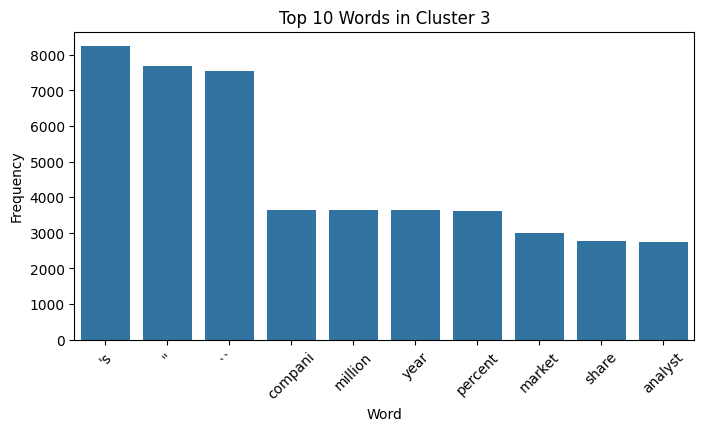

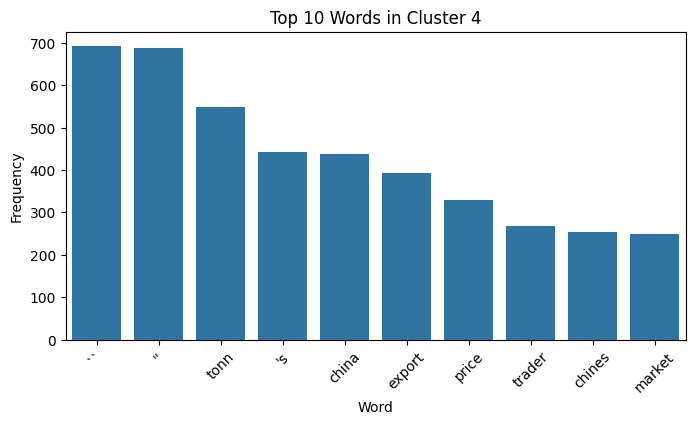

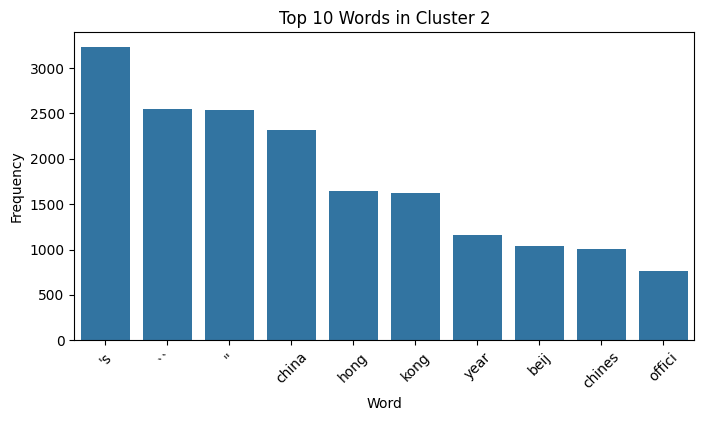

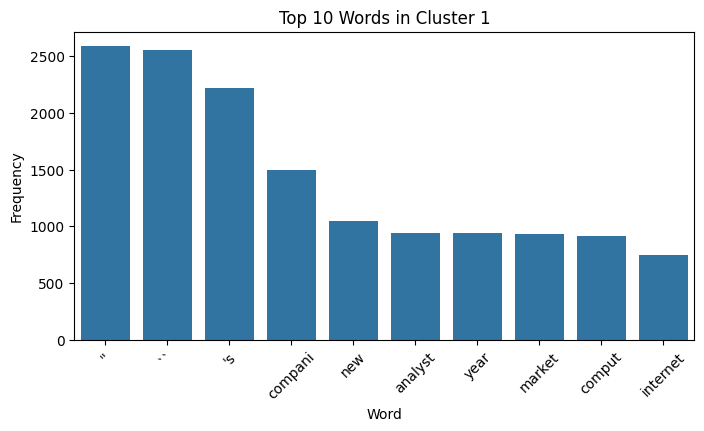

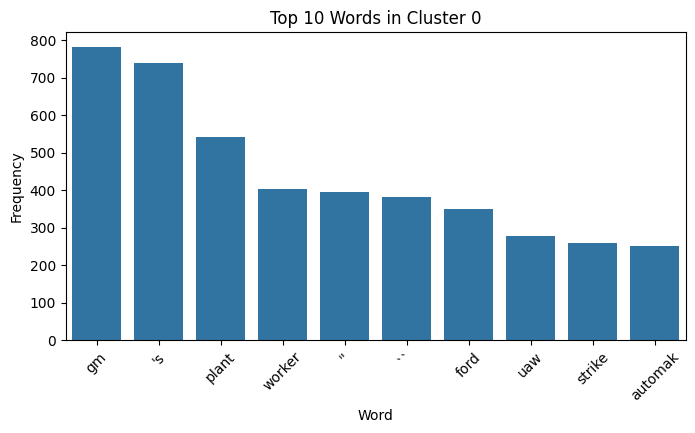

In [69]:
from collections import Counter

for cluster_num in df_author_clusters['cluster'].unique():
    cluster_authors = df_author_clusters[df_author_clusters['cluster'] == cluster_num]['author']
    cluster_texts = [text for author, text in zip(train_labels, train_texts) if author in cluster_authors.values]
    cluster_words = ' '.join(cluster_texts).split()
    common_words = Counter(cluster_words).most_common(10)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
    plt.title(f'Top 10 Words in Cluster {cluster_num}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


From the cluster bar charts it is really easy to see what each cluster of authors usually write about. Apart from the single/double quotes, we can notice that:

Cluster 3 may be a finance analytics group, with key words including company, million, percent, and analyst.

Cluster 4 and cluster 2 are both related to market topics regarding China, with 4 having a focus on market, trade; and 2 on the officials and other key words like Hong Kong.

Cluster 1 focuses on new and emerging/tech topics on the market, with key words like new, computer, and internet. 

Cluster 0 is likely focusing on strikes, specifically on automobile strikes including companies like GM and ford. 

### **Association rule mining**

In [77]:
%pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.5 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import itertools

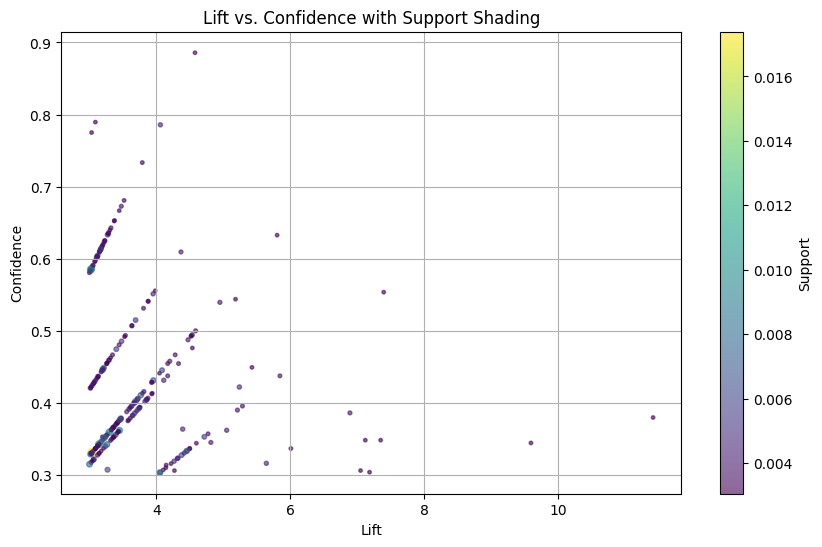

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['lift'], rules['confidence'], s=rules['support']*2000, alpha=0.6, c=rules['support'], cmap='viridis')
plt.colorbar(label='Support')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs. Confidence with Support Shading')
plt.grid(True)

Here's a graph of confidence vs support vs lift for us to use later on for the threshold.

In [113]:
with open('STA380-master/data/groceries.txt', 'r') as file:
    transactions = [line.strip().split(',') for line in file]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = rules[(rules['lift'] > 3) & (rules['confidence'] > 0.3)]

print(rules)

                                                          antecedents                     consequents  antecedent support  consequent support   support  confidence       lift  leverage  conviction  zhangs_metric
0                                             (Instant food products)                (hamburger meat)            0.008033            0.033249  0.003050    0.379747  11.421438  0.002783    1.558640       0.919834
5                                                              (beef)               (root vegetables)            0.052466            0.108998  0.017387    0.331395   3.040367  0.011668    1.332628       0.708251
10                                                           (liquor)                  (bottled beer)            0.011083            0.080529  0.004677    0.422018   5.240594  0.003785    1.590831       0.818250
73                                                            (herbs)               (root vegetables)            0.016268            0.108998  0.007016 

We chose these threshold to maintain a good amount of rules but at the same time still have some kind of threshold that allows us to see useful information. 

In [116]:
G = nx.DiGraph()

for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'], confidence=rule['confidence'])

nx.write_graphml(G, 'STA380-master/data/grocery_rules_.graphml')

print("GraphML file has been saved.")

GraphML file has been saved.


We plotted a association plot with Gephi here.

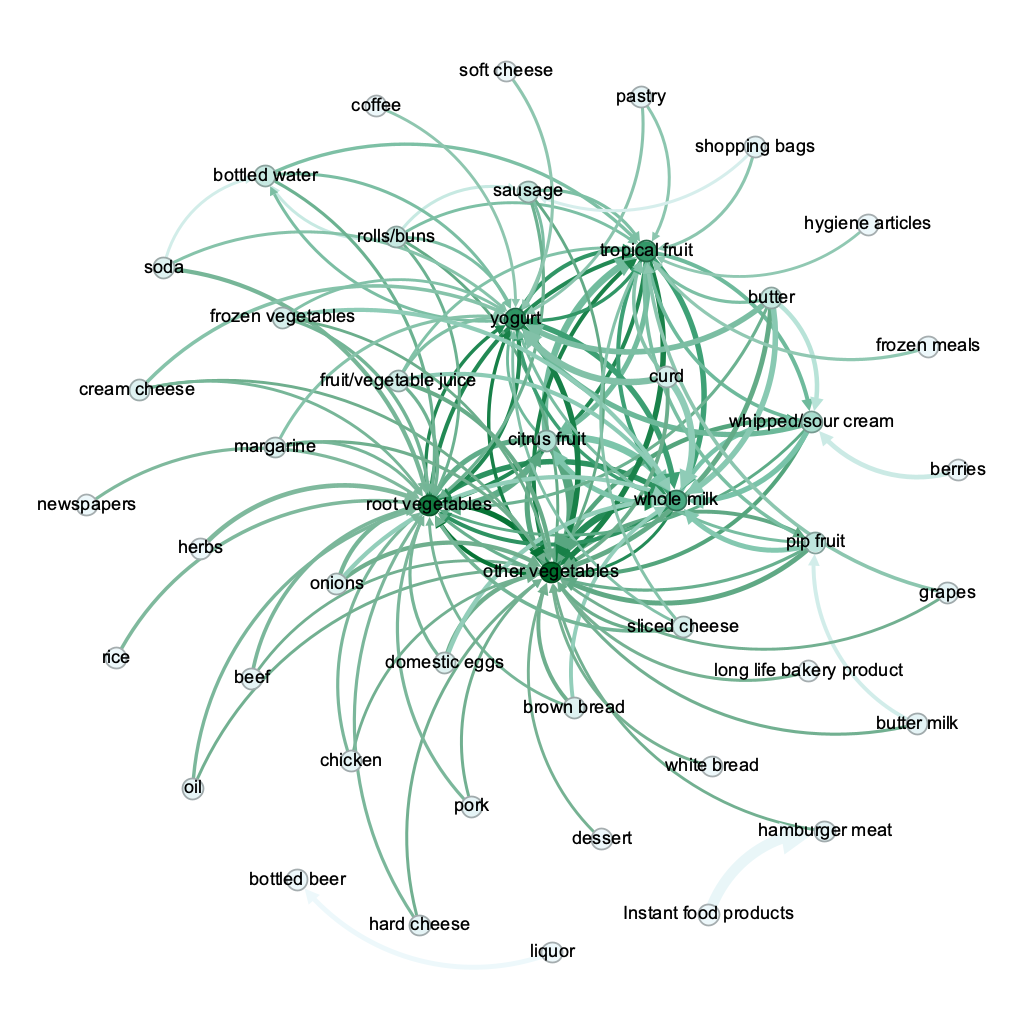

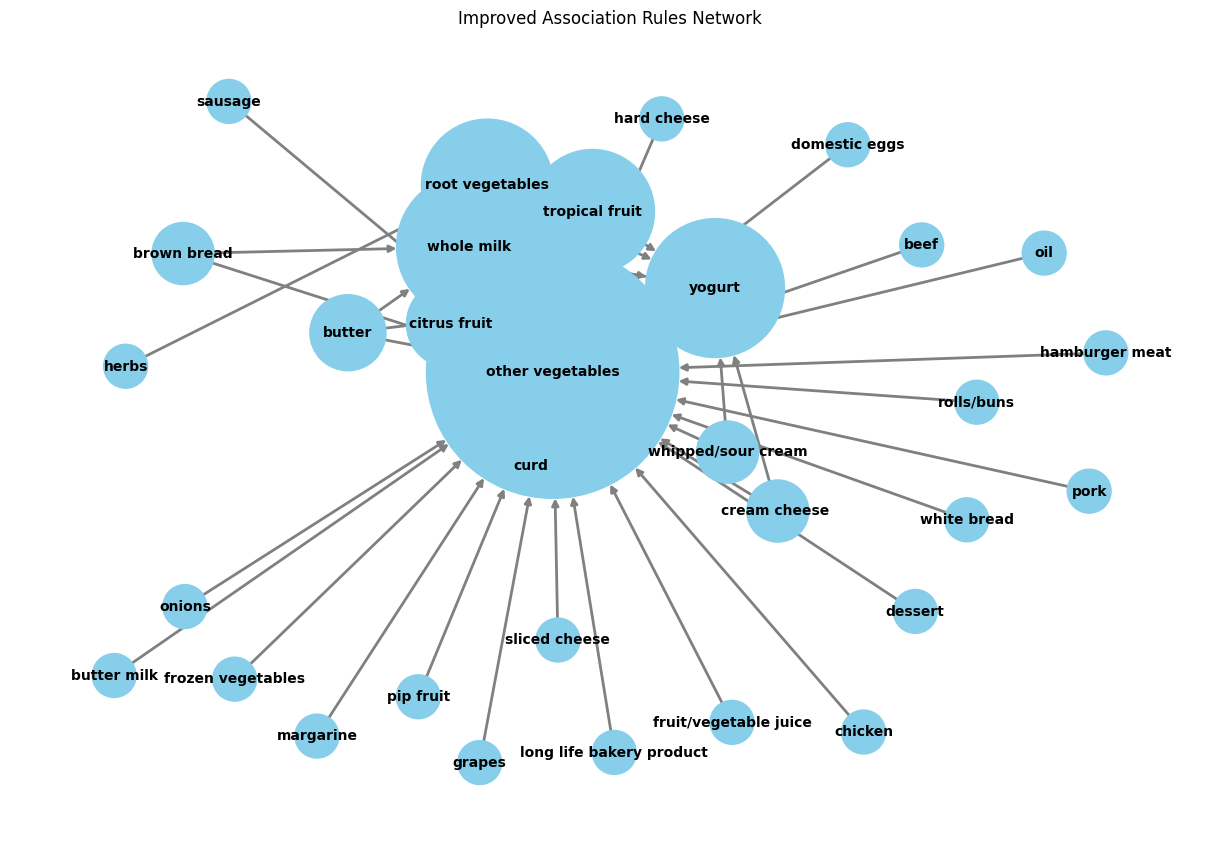

In [132]:
strong_rules = rules[(rules['lift'] > 3) & (rules['confidence'] > 0.5)]
G = nx.DiGraph()

for _, rule in strong_rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

pos = nx.spring_layout(G, k=0.3, iterations=50)

node_size = [1000 * G.degree(node) for node in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=10, node_color='skyblue', edge_color='gray', font_color='black', font_weight='bold', width=2.0)
plt.title('Improved Association Rules Network')
plt.show()


Here is a graph of strong rules, we can see that a lot of items lead to 'other vegetables'.

In [134]:
for index, rule in strong_rules.iterrows():
    print(f"Rule {index}:")
    print(f"Antecedents: {rule['antecedents']}")
    print(f"Consequents: {rule['consequents']}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("-" * 40)

Rule 163:
Antecedents: frozenset({'beef', 'tropical fruit'})
Consequents: frozenset({'other vegetables'})
Support: 0.004473817996949669
Confidence: 0.5866666666666667
Lift: 3.031984585741811
----------------------------------------
Rule 277:
Antecedents: frozenset({'whipped/sour cream', 'brown bread'})
Consequents: frozenset({'other vegetables'})
Support: 0.003050330452465684
Confidence: 0.6521739130434783
Lift: 3.3705362242683177
----------------------------------------
Rule 351:
Antecedents: frozenset({'butter milk', 'pip fruit'})
Consequents: frozenset({'other vegetables'})
Support: 0.003253685815963396
Confidence: 0.64
Lift: 3.3076195480819757
----------------------------------------
Rule 376:
Antecedents: frozenset({'chicken', 'sausage'})
Consequents: frozenset({'other vegetables'})
Support: 0.00315200813421454
Confidence: 0.5961538461538461
Lift: 3.0810158050042444
----------------------------------------
Rule 382:
Antecedents: frozenset({'chicken', 'yogurt'})
Consequents: frozen

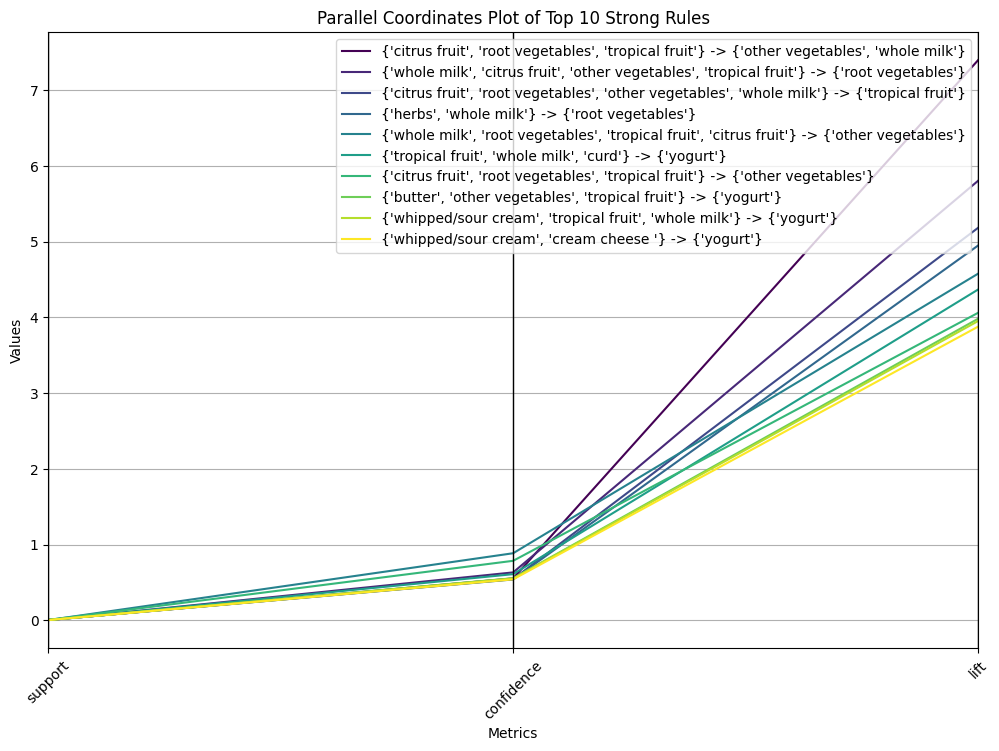

In [136]:
from pandas.plotting import parallel_coordinates

top_rules = strong_rules.nlargest(10, 'lift')

# Convert antecedents and consequents to strings for easier labeling
top_rules['rule'] = top_rules.apply(lambda row: f"{set(row['antecedents'])} -> {set(row['consequents'])}", axis=1)

# Create a new DataFrame for the parallel coordinates plot
parallel_df = top_rules[['support', 'confidence', 'lift', 'rule']]

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(parallel_df, 'rule', color=plt.cm.viridis(np.linspace(0, 1, len(parallel_df))))
plt.title('Parallel Coordinates Plot of Top 10 Strong Rules')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


Here is the support -> confidence -> lift graph for our top ten rules as listed on the legend.

### **Image classification with neural networks**

In [138]:
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np

data_dir = 'STA380-master/data/EuroSAT_RGB'

batch_size = 4

transform = transforms.Compose(
    [transforms.Resize((32, 32)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

dataset = ImageFolder(root=data_dir, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [16]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
from sklearn.metrics import confusion_matrix

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, len(dataset.classes))

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

[1,   100] loss: 2.086


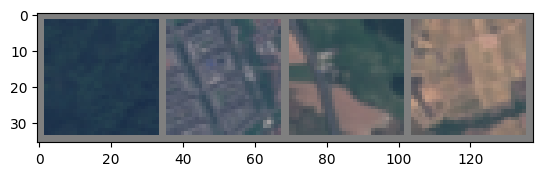

Predicted: Forest River River AnnualCrop
Actual:    Forest Residential Highway PermanentCrop
[1,   200] loss: 1.751


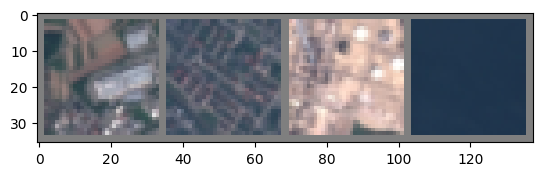

Predicted: Residential HerbaceousVegetation Residential Forest
Actual:    Industrial Residential Industrial SeaLake
[1,   300] loss: 1.624


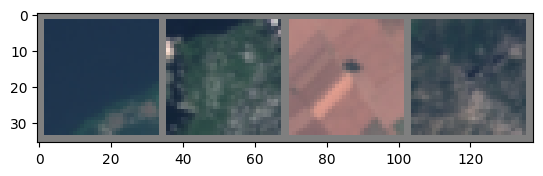

Predicted: Forest Highway AnnualCrop Highway
Actual:    SeaLake HerbaceousVegetation AnnualCrop HerbaceousVegetation
[1,   400] loss: 1.493


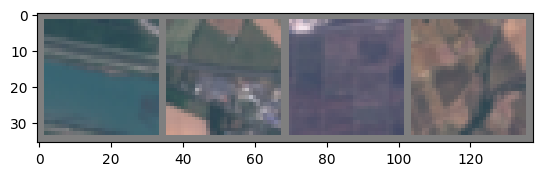

Predicted: River Residential Residential HerbaceousVegetation
Actual:    River Highway PermanentCrop PermanentCrop
[1,   500] loss: 1.350


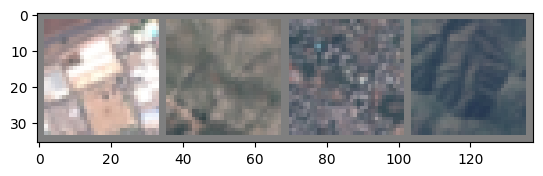

Predicted: Industrial HerbaceousVegetation Residential Residential
Actual:    Industrial HerbaceousVegetation Residential HerbaceousVegetation
[1,   600] loss: 1.300


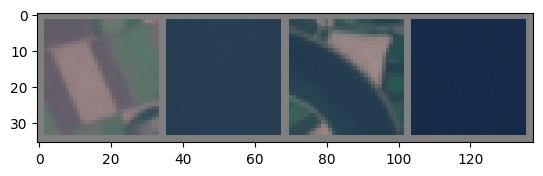

Predicted: HerbaceousVegetation SeaLake River SeaLake
Actual:    AnnualCrop SeaLake River SeaLake
[1,   700] loss: 1.320


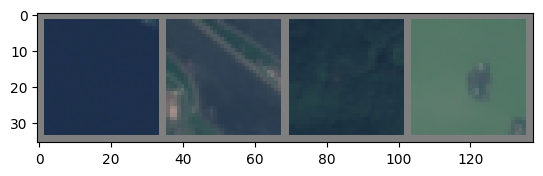

Predicted: SeaLake Forest Forest SeaLake
Actual:    SeaLake River Forest SeaLake
[1,   800] loss: 1.198


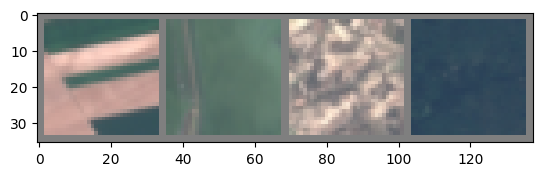

Predicted: AnnualCrop AnnualCrop PermanentCrop Forest
Actual:    AnnualCrop SeaLake PermanentCrop Forest
[1,   900] loss: 1.045


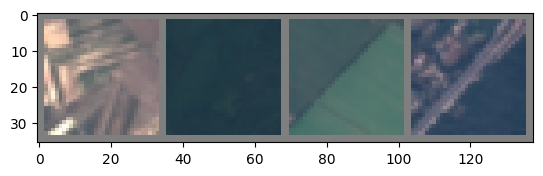

Predicted: PermanentCrop Forest SeaLake Highway
Actual:    PermanentCrop Forest AnnualCrop Highway
[1,  1000] loss: 1.105


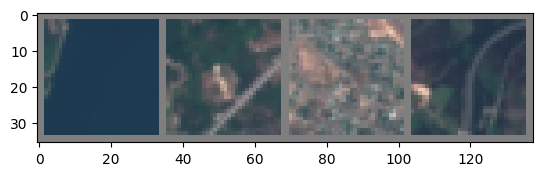

Predicted: SeaLake Residential Residential HerbaceousVegetation
Actual:    SeaLake Highway Residential Highway
[1,  1100] loss: 1.002


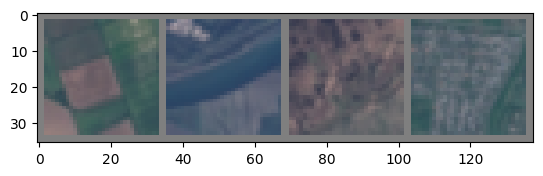

Predicted: HerbaceousVegetation Highway HerbaceousVegetation Residential
Actual:    AnnualCrop River HerbaceousVegetation Residential
[1,  1200] loss: 0.968


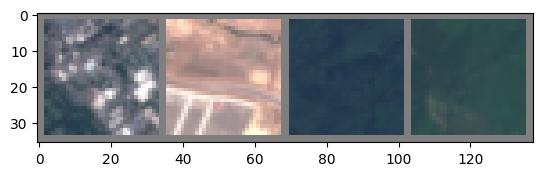

Predicted: Industrial PermanentCrop Forest Forest
Actual:    Industrial Highway Forest Forest
[1,  1300] loss: 0.968


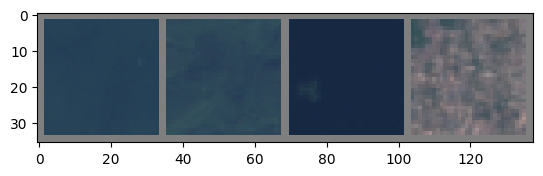

Predicted: SeaLake SeaLake SeaLake Residential
Actual:    SeaLake Forest SeaLake Residential
[1,  1400] loss: 0.956


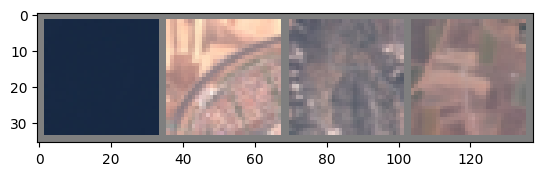

Predicted: SeaLake PermanentCrop Residential HerbaceousVegetation
Actual:    SeaLake Highway HerbaceousVegetation PermanentCrop
[1,  1500] loss: 1.025


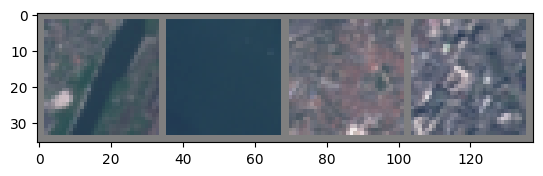

Predicted: River SeaLake Residential Industrial
Actual:    River SeaLake Residential Industrial
[1,  1600] loss: 0.947


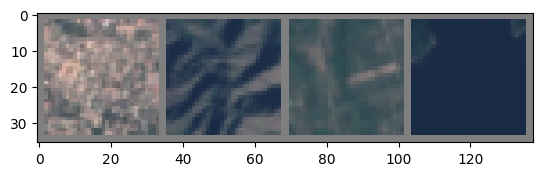

Predicted: Residential River HerbaceousVegetation SeaLake
Actual:    Residential HerbaceousVegetation PermanentCrop SeaLake
[1,  1700] loss: 0.845


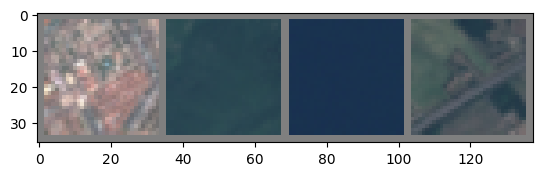

Predicted: Residential Forest SeaLake HerbaceousVegetation
Actual:    Residential Forest SeaLake Highway
[1,  1800] loss: 0.848


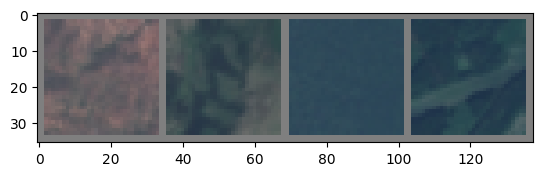

Predicted: HerbaceousVegetation HerbaceousVegetation SeaLake Forest
Actual:    HerbaceousVegetation HerbaceousVegetation Forest River
[1,  1900] loss: 0.875


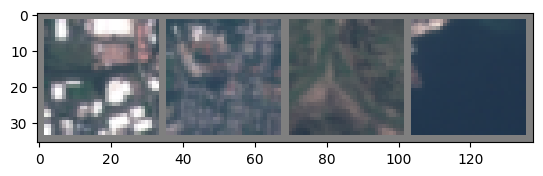

Predicted: Industrial Residential HerbaceousVegetation SeaLake
Actual:    Industrial Residential HerbaceousVegetation SeaLake
[1,  2000] loss: 0.953


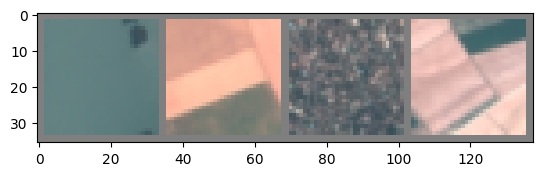

Predicted: SeaLake AnnualCrop Residential AnnualCrop
Actual:    SeaLake AnnualCrop Residential AnnualCrop
[1,  2100] loss: 0.764


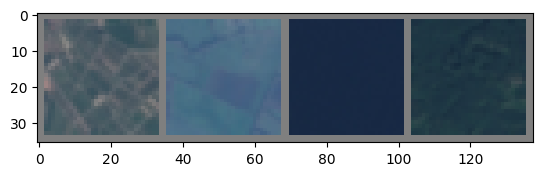

Predicted: Residential Pasture SeaLake Forest
Actual:    PermanentCrop Pasture SeaLake Forest
[1,  2200] loss: 0.807


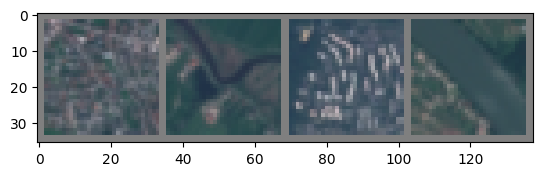

Predicted: Residential Highway Industrial Highway
Actual:    Residential River Residential River
[1,  2300] loss: 0.857


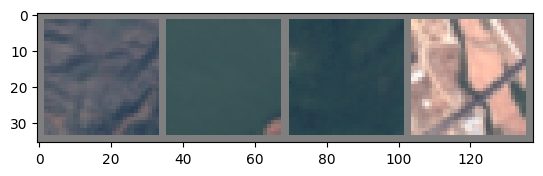

Predicted: Residential Pasture Forest PermanentCrop
Actual:    HerbaceousVegetation SeaLake Forest Highway
[1,  2400] loss: 0.873


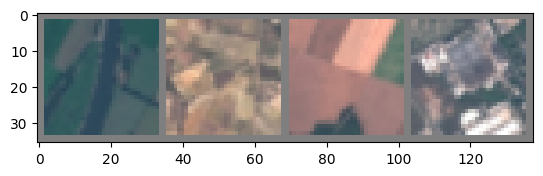

Predicted: River PermanentCrop AnnualCrop Industrial
Actual:    River PermanentCrop AnnualCrop Industrial
[1,  2500] loss: 0.810


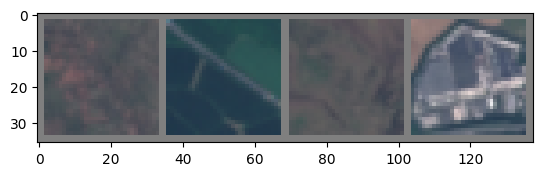

Predicted: HerbaceousVegetation Highway HerbaceousVegetation Industrial
Actual:    HerbaceousVegetation Highway HerbaceousVegetation Industrial
[1,  2600] loss: 0.852


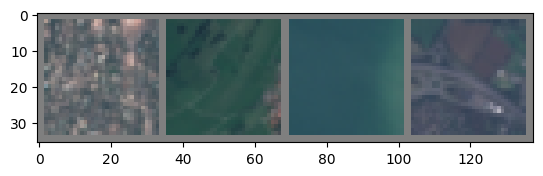

Predicted: Residential Forest SeaLake Residential
Actual:    Residential Pasture SeaLake Highway
[1,  2700] loss: 0.864


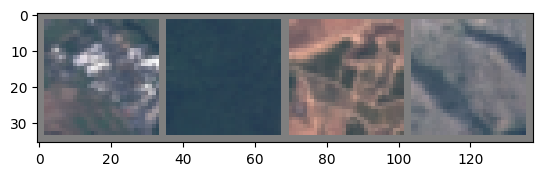

Predicted: Industrial Forest PermanentCrop Highway
Actual:    Industrial Forest PermanentCrop HerbaceousVegetation
[1,  2800] loss: 0.822


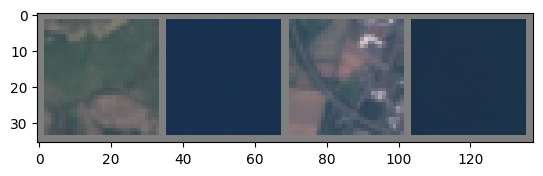

Predicted: Pasture SeaLake Industrial SeaLake
Actual:    HerbaceousVegetation SeaLake Highway SeaLake
[1,  2900] loss: 0.758


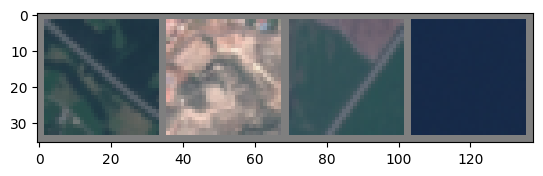

Predicted: Highway PermanentCrop Highway SeaLake
Actual:    Highway PermanentCrop Highway SeaLake
[1,  3000] loss: 0.830


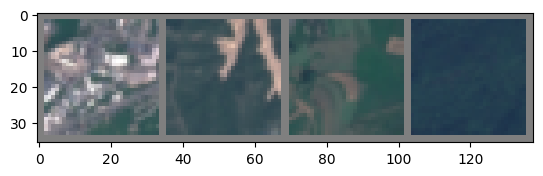

Predicted: Industrial River Pasture SeaLake
Actual:    Industrial HerbaceousVegetation Pasture Forest
[1,  3100] loss: 0.855


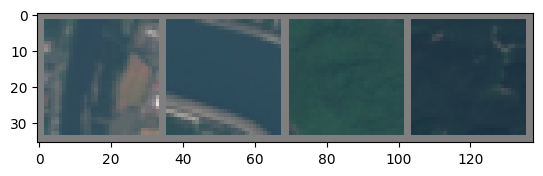

Predicted: River River Forest Forest
Actual:    River River Forest Forest
[1,  3200] loss: 0.746


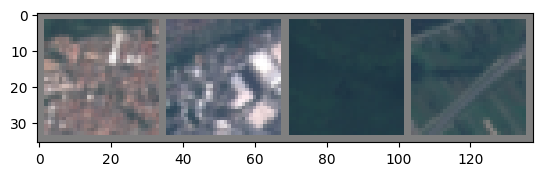

Predicted: Residential Industrial Forest Highway
Actual:    Residential Industrial Forest Highway
[1,  3300] loss: 0.786


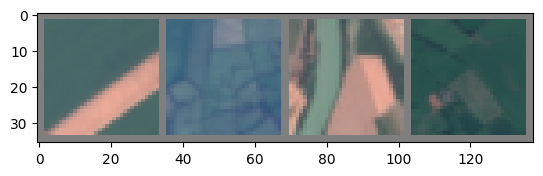

Predicted: AnnualCrop Pasture AnnualCrop Pasture
Actual:    AnnualCrop Pasture River Pasture
[1,  3400] loss: 0.787


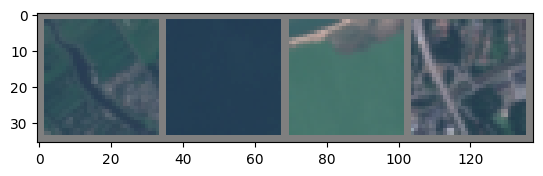

Predicted: Highway SeaLake SeaLake Highway
Actual:    River SeaLake SeaLake Highway
[1,  3500] loss: 0.704


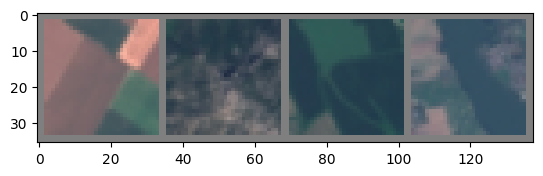

Predicted: AnnualCrop HerbaceousVegetation Pasture River
Actual:    AnnualCrop HerbaceousVegetation AnnualCrop River
[1,  3600] loss: 0.763


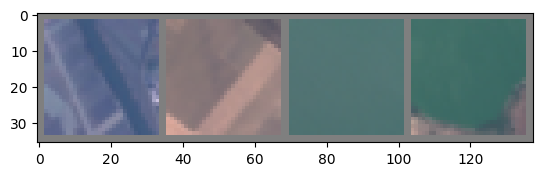

Predicted: Highway AnnualCrop SeaLake SeaLake
Actual:    River AnnualCrop SeaLake SeaLake
[2,   100] loss: 0.670


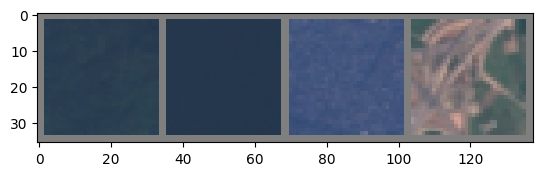

Predicted: Forest Forest HerbaceousVegetation PermanentCrop
Actual:    Forest SeaLake Residential Highway
[2,   200] loss: 0.688


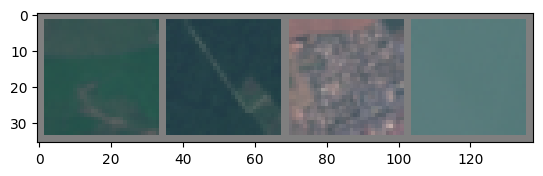

Predicted: Pasture Forest Residential SeaLake
Actual:    Pasture Forest Residential SeaLake
[2,   300] loss: 0.692


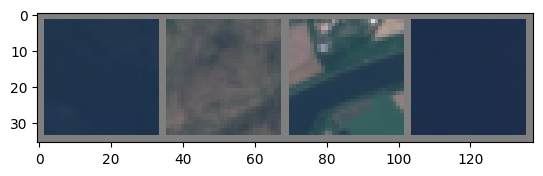

Predicted: SeaLake HerbaceousVegetation River SeaLake
Actual:    SeaLake HerbaceousVegetation River SeaLake
[2,   400] loss: 0.736


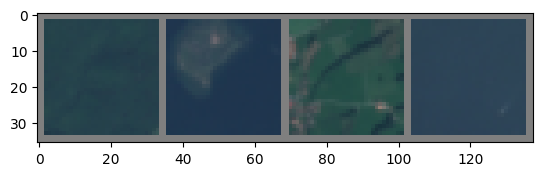

Predicted: Forest River Pasture Forest
Actual:    Forest SeaLake Pasture SeaLake
[2,   500] loss: 0.737


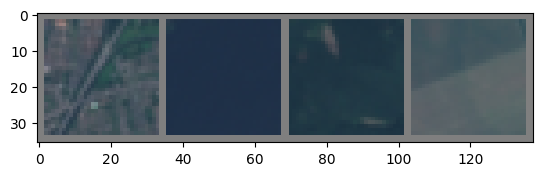

Predicted: Residential Forest Forest SeaLake
Actual:    Highway SeaLake Forest AnnualCrop
[2,   600] loss: 0.712


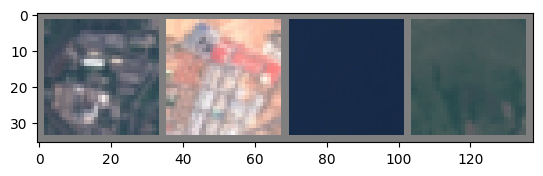

Predicted: Industrial Industrial SeaLake AnnualCrop
Actual:    Industrial Industrial SeaLake Pasture
[2,   700] loss: 0.757


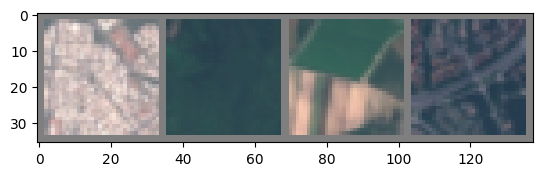

Predicted: Residential Forest AnnualCrop Residential
Actual:    Residential Forest AnnualCrop Highway
[2,   800] loss: 0.688


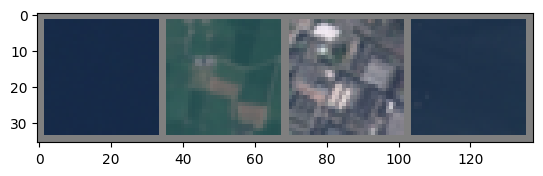

Predicted: SeaLake Pasture Industrial SeaLake
Actual:    SeaLake Pasture Industrial SeaLake
[2,   900] loss: 0.656


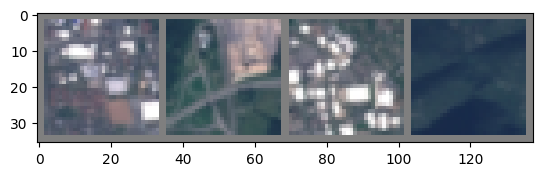

Predicted: Industrial Highway Industrial SeaLake
Actual:    Industrial Highway Industrial HerbaceousVegetation
[2,  1000] loss: 0.690


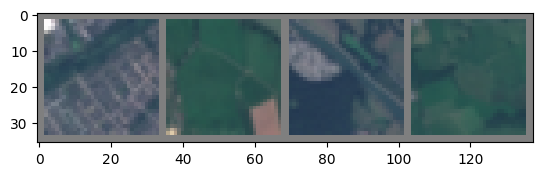

Predicted: Residential Pasture Highway Pasture
Actual:    Residential Pasture River Pasture
[2,  1100] loss: 0.669


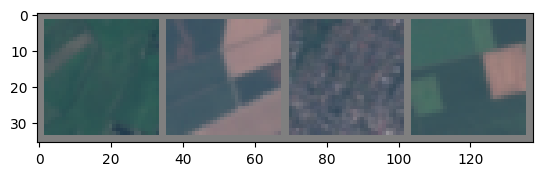

Predicted: Pasture AnnualCrop Residential AnnualCrop
Actual:    Pasture AnnualCrop Residential AnnualCrop
[2,  1200] loss: 0.725


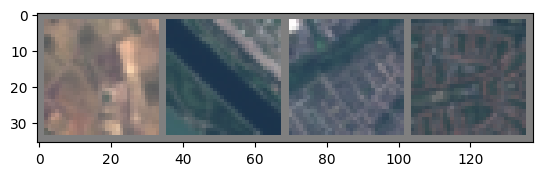

Predicted: PermanentCrop River Residential Residential
Actual:    PermanentCrop River Residential Residential
[2,  1300] loss: 0.702


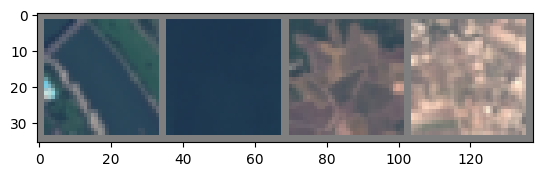

Predicted: River SeaLake PermanentCrop HerbaceousVegetation
Actual:    River SeaLake PermanentCrop PermanentCrop
[2,  1400] loss: 0.650


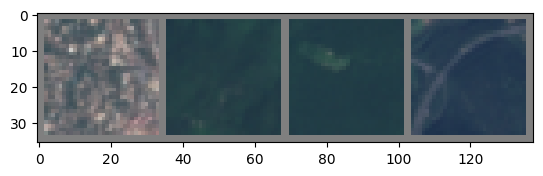

Predicted: Residential Forest Forest HerbaceousVegetation
Actual:    Residential Forest Forest Highway
[2,  1500] loss: 0.659


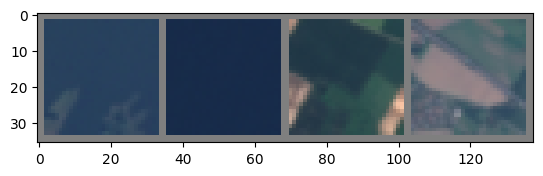

Predicted: SeaLake SeaLake AnnualCrop AnnualCrop
Actual:    SeaLake SeaLake AnnualCrop Highway
[2,  1600] loss: 0.623


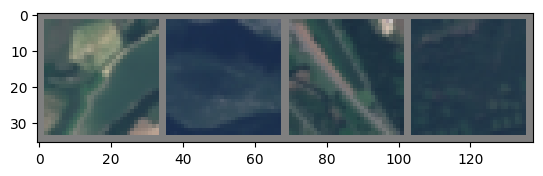

Predicted: Highway HerbaceousVegetation Highway Forest
Actual:    River HerbaceousVegetation Highway Forest
[2,  1700] loss: 0.664


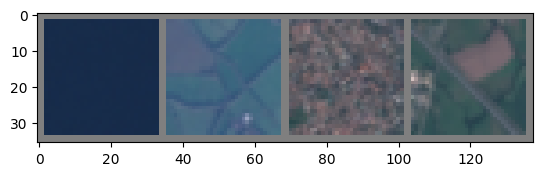

Predicted: SeaLake Pasture Residential Highway
Actual:    SeaLake Pasture Residential Highway
[2,  1800] loss: 0.598


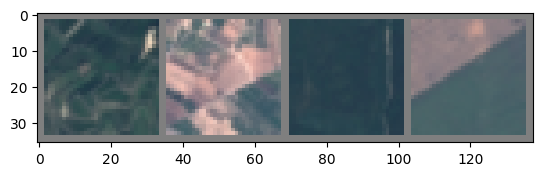

Predicted: Highway PermanentCrop Forest AnnualCrop
Actual:    PermanentCrop PermanentCrop Forest AnnualCrop
[2,  1900] loss: 0.675


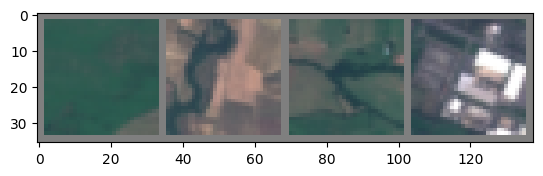

Predicted: SeaLake PermanentCrop Pasture Industrial
Actual:    Pasture PermanentCrop Pasture Industrial
[2,  2000] loss: 0.738


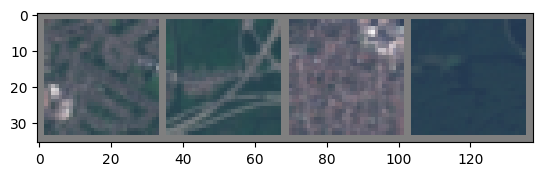

Predicted: Residential Highway Residential Forest
Actual:    Residential Highway Residential Forest
[2,  2100] loss: 0.758


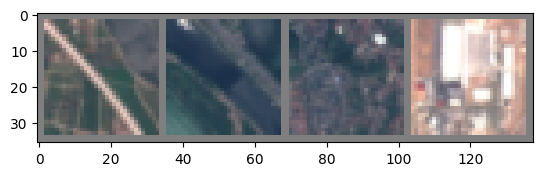

Predicted: Highway River Residential Industrial
Actual:    Highway River Residential Industrial
[2,  2200] loss: 0.601


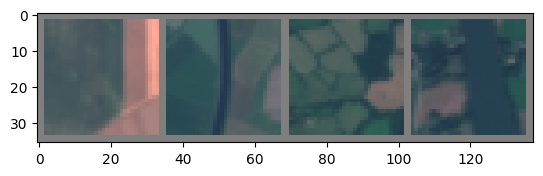

Predicted: AnnualCrop River Pasture River
Actual:    AnnualCrop River Pasture River
[2,  2300] loss: 0.588


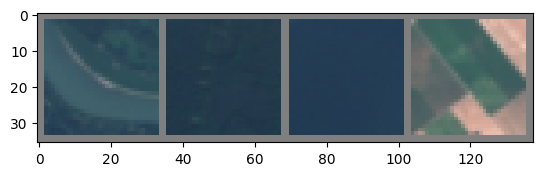

Predicted: Highway Forest SeaLake AnnualCrop
Actual:    River Forest SeaLake AnnualCrop
[2,  2400] loss: 0.706


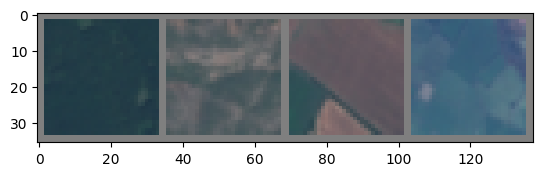

Predicted: Forest HerbaceousVegetation AnnualCrop Pasture
Actual:    Forest HerbaceousVegetation AnnualCrop Pasture
[2,  2500] loss: 0.623


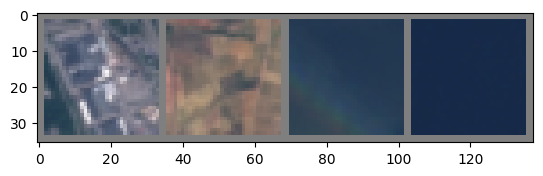

Predicted: Industrial PermanentCrop Forest SeaLake
Actual:    Industrial PermanentCrop SeaLake SeaLake
[2,  2600] loss: 0.703


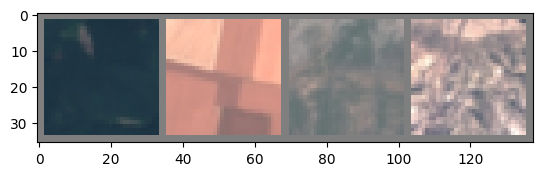

Predicted: Forest AnnualCrop HerbaceousVegetation PermanentCrop
Actual:    Forest AnnualCrop HerbaceousVegetation HerbaceousVegetation
[2,  2700] loss: 0.673


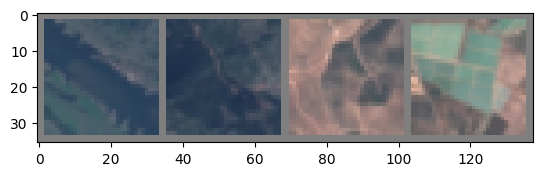

Predicted: River HerbaceousVegetation PermanentCrop AnnualCrop
Actual:    River HerbaceousVegetation HerbaceousVegetation PermanentCrop
[2,  2800] loss: 0.646


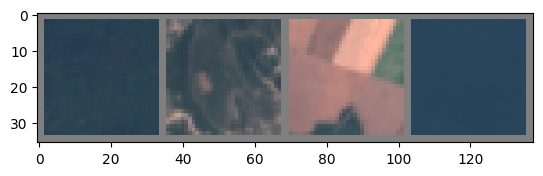

Predicted: Forest PermanentCrop AnnualCrop Forest
Actual:    Forest HerbaceousVegetation AnnualCrop SeaLake
[2,  2900] loss: 0.668


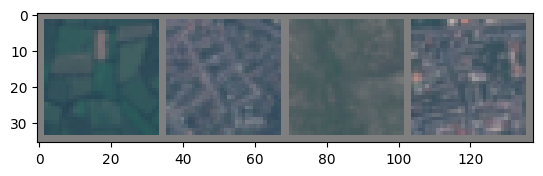

Predicted: Pasture Residential HerbaceousVegetation Residential
Actual:    Pasture Residential HerbaceousVegetation Residential
[2,  3000] loss: 0.591


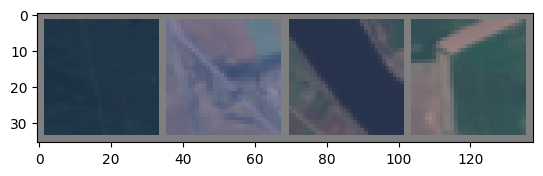

Predicted: Forest Highway River AnnualCrop
Actual:    Forest Highway River AnnualCrop
[2,  3100] loss: 0.633


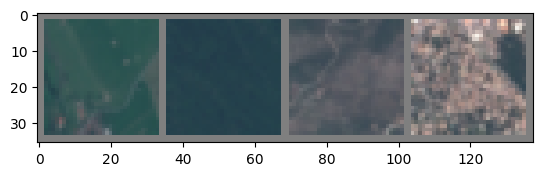

Predicted: Pasture Forest HerbaceousVegetation Residential
Actual:    Pasture Forest HerbaceousVegetation Residential
[2,  3200] loss: 0.640


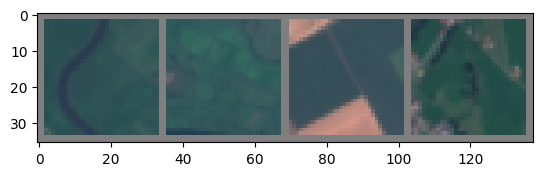

Predicted: Pasture AnnualCrop AnnualCrop Pasture
Actual:    River Pasture AnnualCrop Pasture
[2,  3300] loss: 0.704


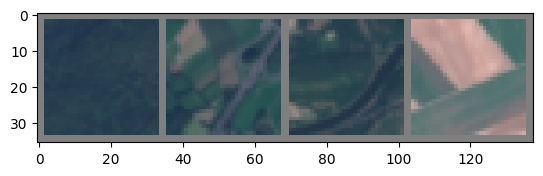

Predicted: Forest Highway Highway AnnualCrop
Actual:    Forest Highway River AnnualCrop
[2,  3400] loss: 0.693


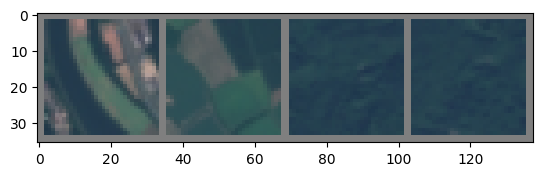

Predicted: River Pasture Forest Forest
Actual:    River AnnualCrop Forest Forest
[2,  3500] loss: 0.612


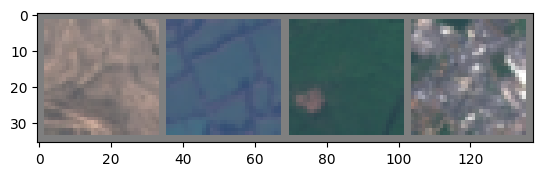

Predicted: HerbaceousVegetation River Pasture Industrial
Actual:    HerbaceousVegetation Pasture Forest Industrial
[2,  3600] loss: 0.659


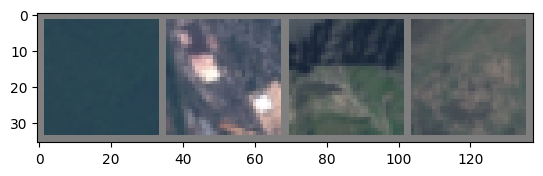

Predicted: Forest Industrial HerbaceousVegetation HerbaceousVegetation
Actual:    Forest Industrial HerbaceousVegetation HerbaceousVegetation
[3,   100] loss: 0.574


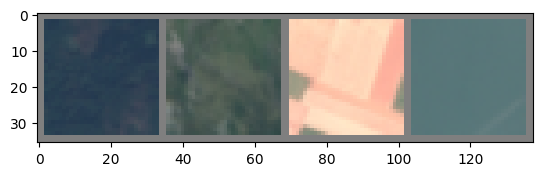

Predicted: Forest HerbaceousVegetation PermanentCrop SeaLake
Actual:    Forest HerbaceousVegetation AnnualCrop SeaLake
[3,   200] loss: 0.534


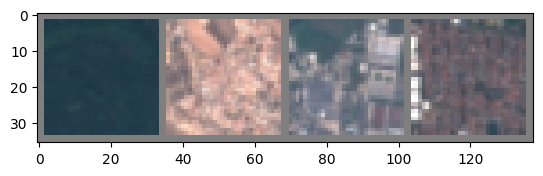

Predicted: Forest Highway Industrial Highway
Actual:    Forest Residential Industrial Residential
[3,   300] loss: 0.500


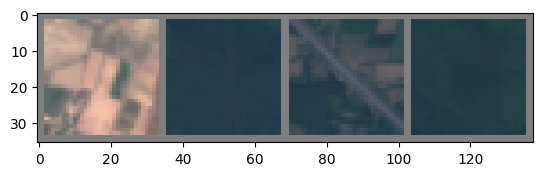

Predicted: PermanentCrop Forest Highway Forest
Actual:    PermanentCrop Forest Highway Forest
[3,   400] loss: 0.602


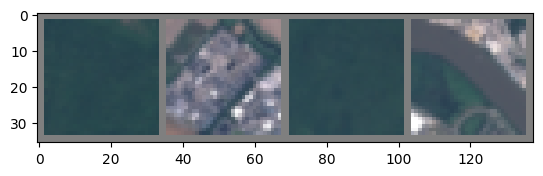

Predicted: Forest Industrial Forest Highway
Actual:    Forest Industrial Forest River
[3,   500] loss: 0.551


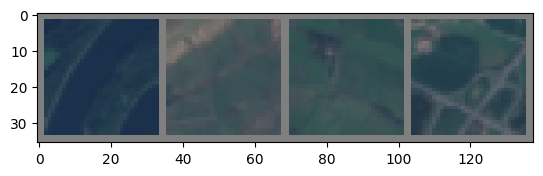

Predicted: SeaLake Pasture Pasture Highway
Actual:    River HerbaceousVegetation Pasture Highway
[3,   600] loss: 0.500


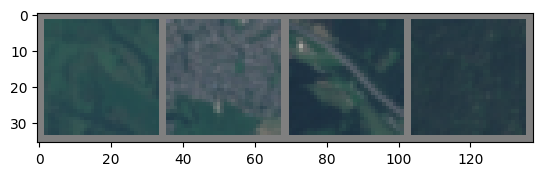

Predicted: Pasture Residential Highway Forest
Actual:    Pasture Residential Highway Forest
[3,   700] loss: 0.699


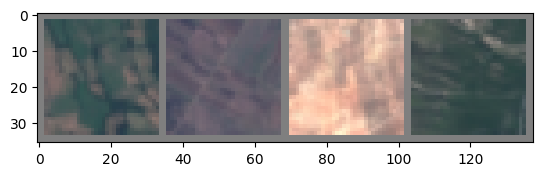

Predicted: Pasture PermanentCrop PermanentCrop Pasture
Actual:    Pasture PermanentCrop PermanentCrop HerbaceousVegetation
[3,   800] loss: 0.549


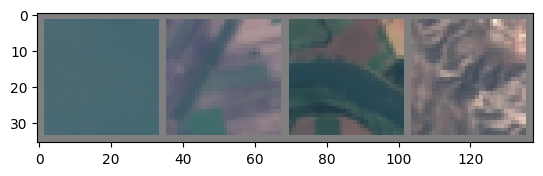

Predicted: SeaLake AnnualCrop AnnualCrop HerbaceousVegetation
Actual:    SeaLake AnnualCrop River HerbaceousVegetation
[3,   900] loss: 0.562


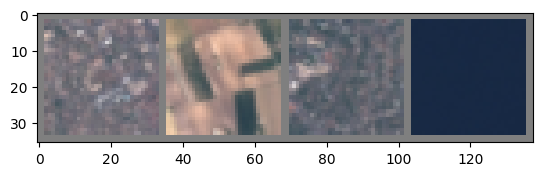

Predicted: Residential AnnualCrop Residential SeaLake
Actual:    Residential PermanentCrop Residential SeaLake
[3,  1000] loss: 0.559


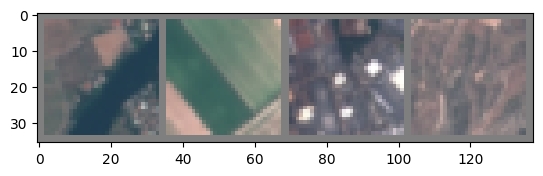

Predicted: River AnnualCrop Industrial HerbaceousVegetation
Actual:    River AnnualCrop Industrial HerbaceousVegetation
[3,  1100] loss: 0.579


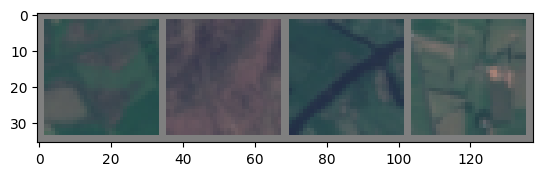

Predicted: Forest HerbaceousVegetation River Pasture
Actual:    Pasture HerbaceousVegetation River Pasture
[3,  1200] loss: 0.577


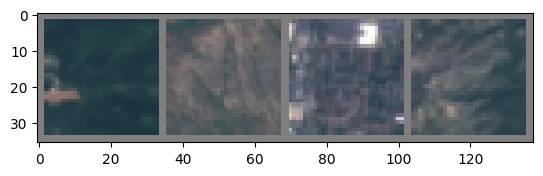

Predicted: Forest HerbaceousVegetation River HerbaceousVegetation
Actual:    Forest HerbaceousVegetation Residential HerbaceousVegetation
[3,  1300] loss: 0.518


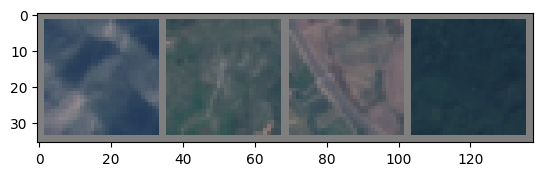

Predicted: River Pasture HerbaceousVegetation Forest
Actual:    HerbaceousVegetation HerbaceousVegetation Highway Forest
[3,  1400] loss: 0.536


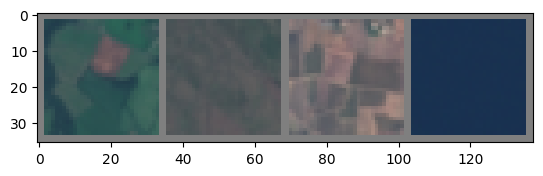

Predicted: Pasture HerbaceousVegetation HerbaceousVegetation SeaLake
Actual:    Pasture HerbaceousVegetation PermanentCrop SeaLake
[3,  1500] loss: 0.537


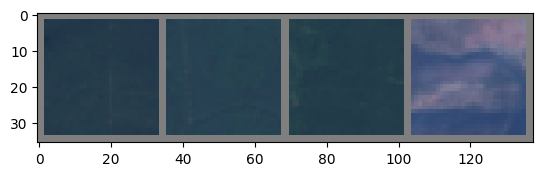

Predicted: Forest Forest Forest Residential
Actual:    Forest Forest Forest HerbaceousVegetation
[3,  1600] loss: 0.561


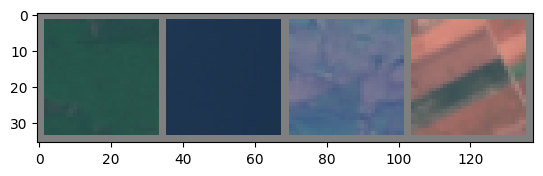

Predicted: Pasture SeaLake Residential AnnualCrop
Actual:    Forest SeaLake Pasture AnnualCrop
[3,  1700] loss: 0.529


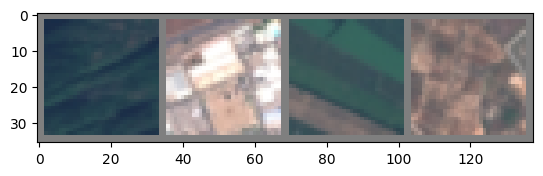

Predicted: Forest Industrial AnnualCrop PermanentCrop
Actual:    Forest Industrial AnnualCrop PermanentCrop
[3,  1800] loss: 0.552


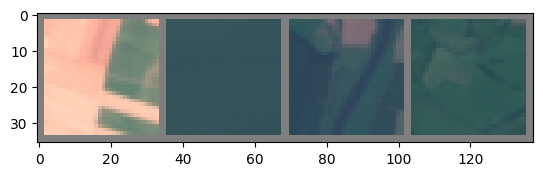

Predicted: AnnualCrop SeaLake River Pasture
Actual:    AnnualCrop SeaLake River Pasture
[3,  1900] loss: 0.569


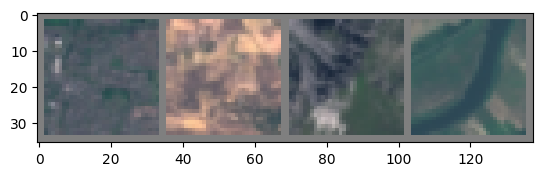

Predicted: Residential PermanentCrop Highway River
Actual:    Residential PermanentCrop HerbaceousVegetation River
[3,  2000] loss: 0.436


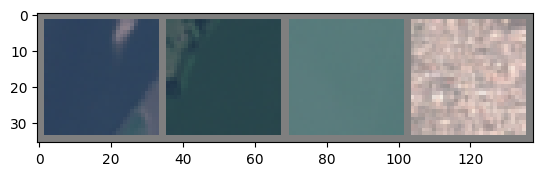

Predicted: River Forest SeaLake Residential
Actual:    SeaLake SeaLake SeaLake Residential
[3,  2100] loss: 0.554


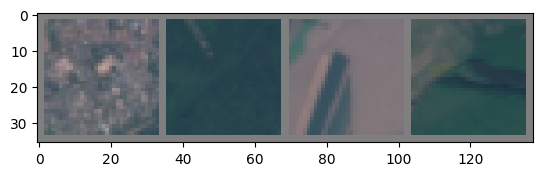

Predicted: Residential Forest AnnualCrop Forest
Actual:    Residential Forest AnnualCrop Pasture
[3,  2200] loss: 0.624


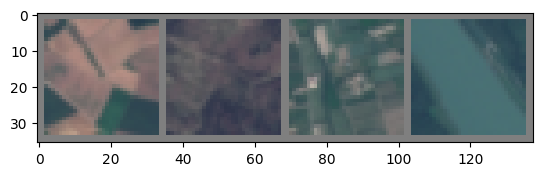

Predicted: AnnualCrop HerbaceousVegetation Highway River
Actual:    AnnualCrop HerbaceousVegetation PermanentCrop River
[3,  2300] loss: 0.623


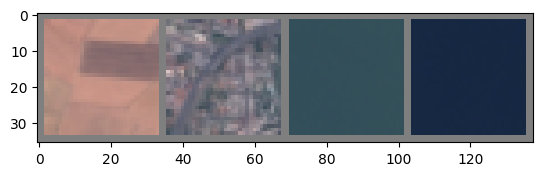

Predicted: AnnualCrop Residential SeaLake SeaLake
Actual:    AnnualCrop Highway SeaLake SeaLake
[3,  2400] loss: 0.594


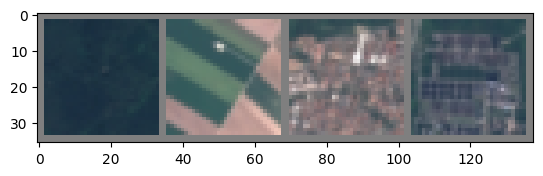

Predicted: Forest AnnualCrop Residential Residential
Actual:    Forest AnnualCrop Residential Industrial
[3,  2500] loss: 0.535


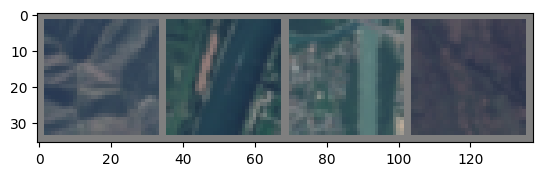

Predicted: HerbaceousVegetation River River HerbaceousVegetation
Actual:    HerbaceousVegetation River River HerbaceousVegetation
[3,  2600] loss: 0.565


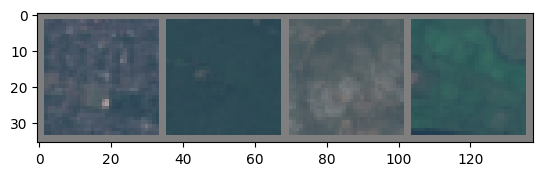

Predicted: Residential Forest HerbaceousVegetation Pasture
Actual:    Residential Forest HerbaceousVegetation Pasture
[3,  2700] loss: 0.499


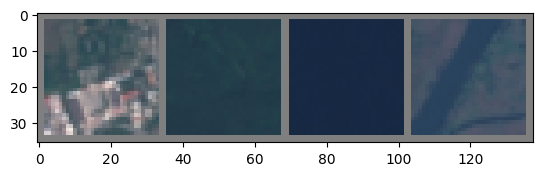

Predicted: Industrial Forest SeaLake River
Actual:    Industrial Forest SeaLake River
[3,  2800] loss: 0.471


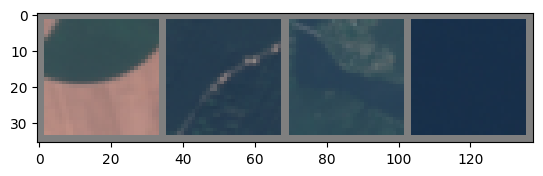

Predicted: AnnualCrop River River SeaLake
Actual:    AnnualCrop Forest River SeaLake
[3,  2900] loss: 0.498


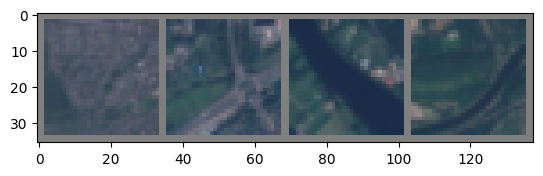

Predicted: Residential Residential River Highway
Actual:    Residential Highway River River
[3,  3000] loss: 0.495


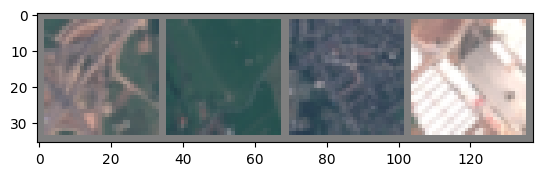

Predicted: Residential Pasture Residential Industrial
Actual:    Highway Pasture Residential Industrial
[3,  3100] loss: 0.557


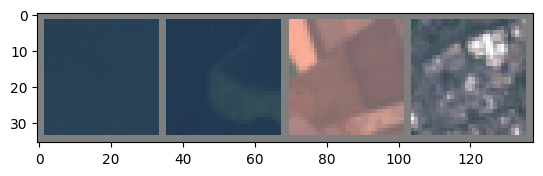

Predicted: SeaLake Forest AnnualCrop Industrial
Actual:    SeaLake SeaLake AnnualCrop Industrial
[3,  3200] loss: 0.556


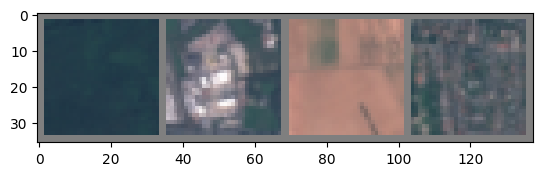

Predicted: Forest Industrial AnnualCrop Residential
Actual:    Forest Industrial AnnualCrop Residential
[3,  3300] loss: 0.535


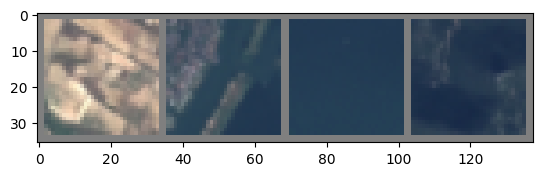

Predicted: PermanentCrop River SeaLake HerbaceousVegetation
Actual:    PermanentCrop River SeaLake HerbaceousVegetation
[3,  3400] loss: 0.520


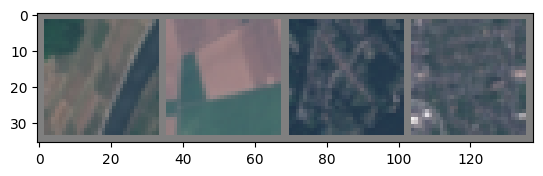

Predicted: Highway AnnualCrop Residential Residential
Actual:    River AnnualCrop Residential Residential
[3,  3500] loss: 0.580


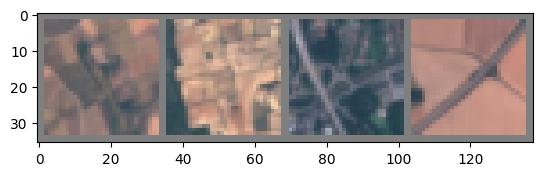

Predicted: PermanentCrop PermanentCrop Highway AnnualCrop
Actual:    PermanentCrop PermanentCrop Highway Highway
[3,  3600] loss: 0.488


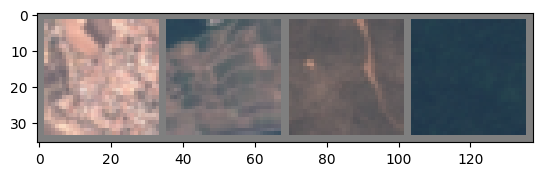

Predicted: PermanentCrop PermanentCrop PermanentCrop Forest
Actual:    Residential PermanentCrop HerbaceousVegetation Forest
[4,   100] loss: 0.442


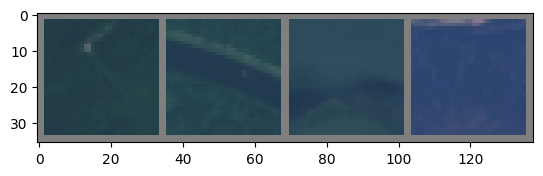

Predicted: Forest River SeaLake SeaLake
Actual:    Forest River SeaLake HerbaceousVegetation
[4,   200] loss: 0.461


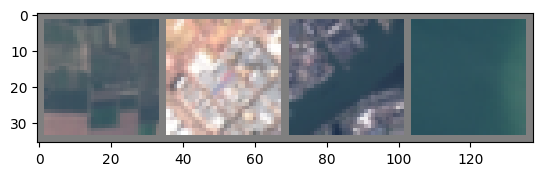

Predicted: River Industrial River SeaLake
Actual:    PermanentCrop Industrial River SeaLake
[4,   300] loss: 0.370


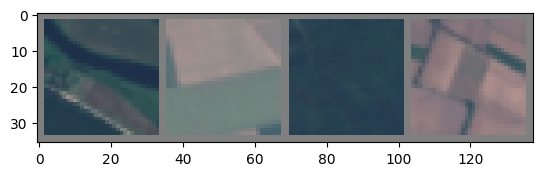

Predicted: River SeaLake Forest AnnualCrop
Actual:    River AnnualCrop Forest AnnualCrop
[4,   400] loss: 0.479


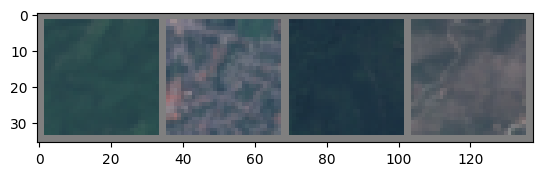

Predicted: Pasture Residential Forest HerbaceousVegetation
Actual:    Forest Residential Forest HerbaceousVegetation
[4,   500] loss: 0.498


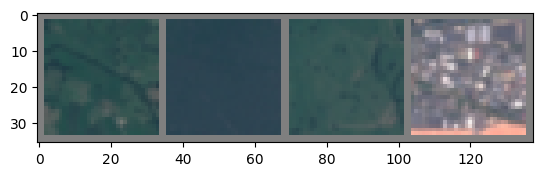

Predicted: Pasture Forest Pasture Industrial
Actual:    Pasture Forest Pasture Industrial
[4,   600] loss: 0.384


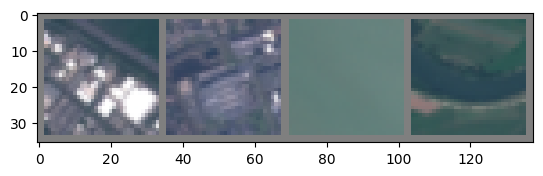

Predicted: Industrial Industrial SeaLake River
Actual:    Industrial Industrial SeaLake River
[4,   700] loss: 0.525


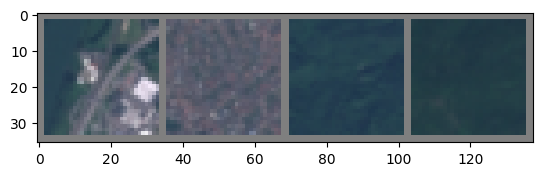

Predicted: Industrial Residential SeaLake Forest
Actual:    Highway Residential Forest Forest
[4,   800] loss: 0.434


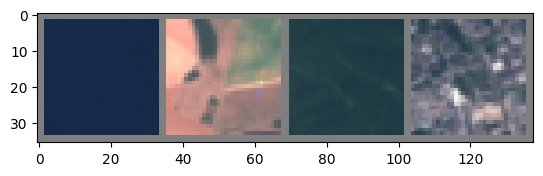

Predicted: SeaLake AnnualCrop Forest Industrial
Actual:    SeaLake AnnualCrop Forest Industrial
[4,   900] loss: 0.421


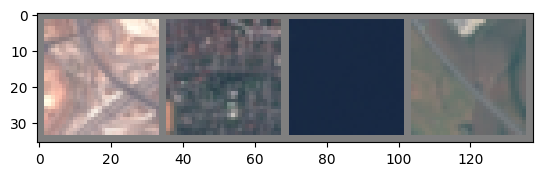

Predicted: Highway Residential SeaLake PermanentCrop
Actual:    Highway Residential SeaLake Highway
[4,  1000] loss: 0.467


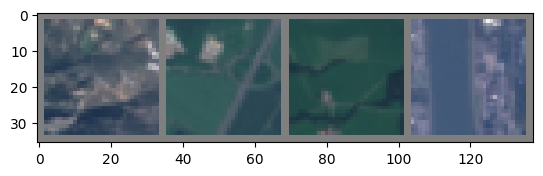

Predicted: Highway Highway Pasture River
Actual:    HerbaceousVegetation Highway Pasture River
[4,  1100] loss: 0.444


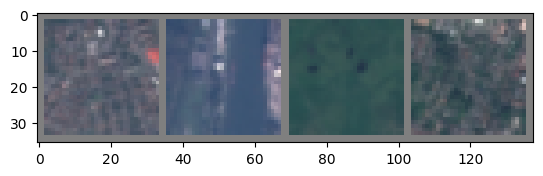

Predicted: Residential River Pasture Residential
Actual:    Residential River Pasture Residential
[4,  1200] loss: 0.543


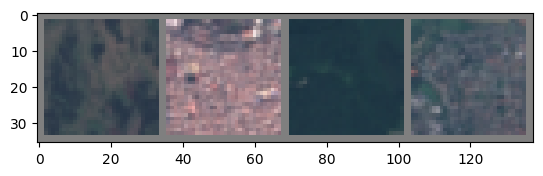

Predicted: HerbaceousVegetation Residential Forest Residential
Actual:    HerbaceousVegetation Residential Forest Residential
[4,  1300] loss: 0.430


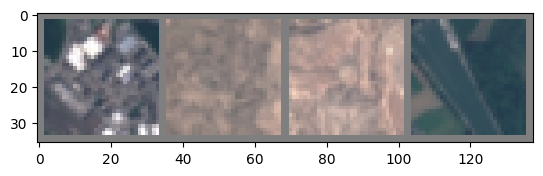

Predicted: Industrial HerbaceousVegetation PermanentCrop River
Actual:    Industrial HerbaceousVegetation HerbaceousVegetation River
[4,  1400] loss: 0.482


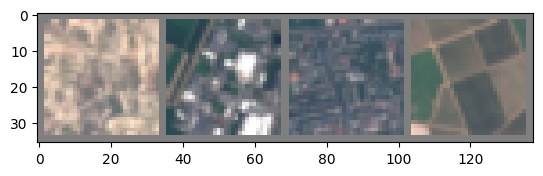

Predicted: PermanentCrop Industrial Residential PermanentCrop
Actual:    PermanentCrop Industrial Residential PermanentCrop
[4,  1500] loss: 0.530


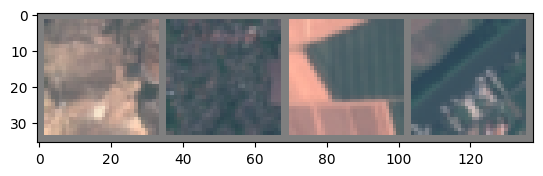

Predicted: Highway Residential AnnualCrop River
Actual:    PermanentCrop Residential AnnualCrop River
[4,  1600] loss: 0.416


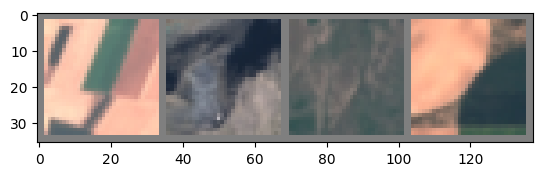

Predicted: AnnualCrop HerbaceousVegetation HerbaceousVegetation AnnualCrop
Actual:    AnnualCrop HerbaceousVegetation HerbaceousVegetation AnnualCrop
[4,  1700] loss: 0.524


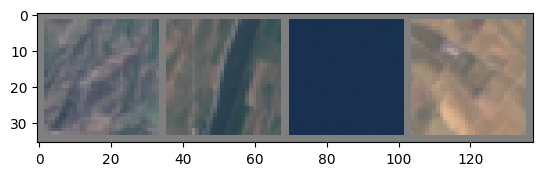

Predicted: Residential River SeaLake PermanentCrop
Actual:    HerbaceousVegetation River SeaLake PermanentCrop
[4,  1800] loss: 0.395


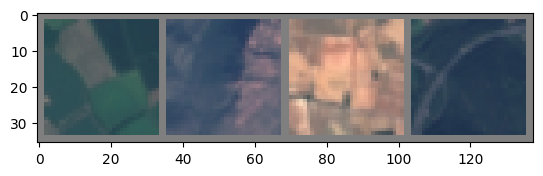

Predicted: Pasture River PermanentCrop River
Actual:    AnnualCrop HerbaceousVegetation PermanentCrop Highway
[4,  1900] loss: 0.477


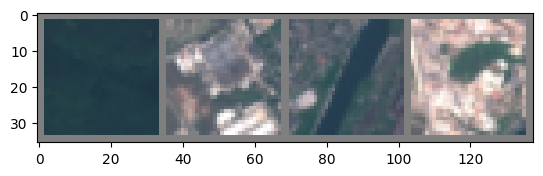

Predicted: Forest Industrial River Industrial
Actual:    Forest Industrial River Industrial
[4,  2000] loss: 0.423


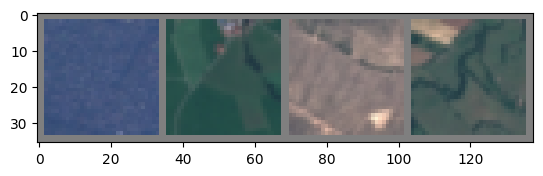

Predicted: Residential Pasture HerbaceousVegetation PermanentCrop
Actual:    Residential Pasture HerbaceousVegetation Pasture
[4,  2100] loss: 0.557


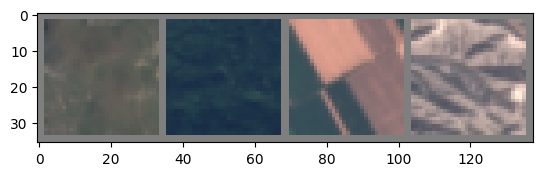

Predicted: HerbaceousVegetation Forest AnnualCrop HerbaceousVegetation
Actual:    HerbaceousVegetation Forest AnnualCrop HerbaceousVegetation
[4,  2200] loss: 0.417


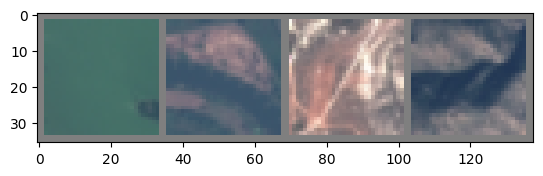

Predicted: SeaLake PermanentCrop PermanentCrop River
Actual:    SeaLake River HerbaceousVegetation HerbaceousVegetation
[4,  2300] loss: 0.430


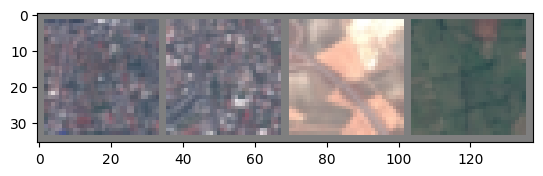

Predicted: Residential Residential Highway HerbaceousVegetation
Actual:    Residential Residential Highway Pasture
[4,  2400] loss: 0.444


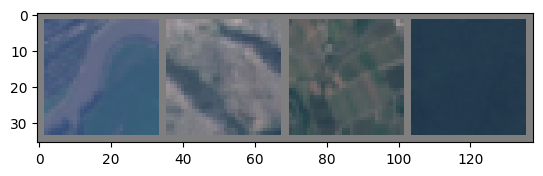

Predicted: Pasture PermanentCrop HerbaceousVegetation SeaLake
Actual:    River HerbaceousVegetation PermanentCrop Forest
[4,  2500] loss: 0.431


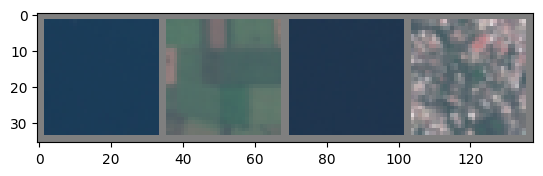

Predicted: SeaLake AnnualCrop SeaLake Industrial
Actual:    SeaLake AnnualCrop SeaLake Residential
[4,  2600] loss: 0.452


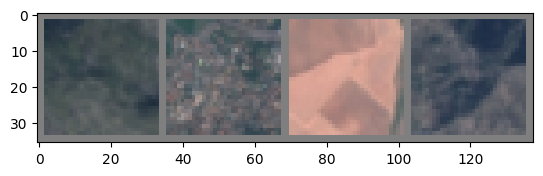

Predicted: HerbaceousVegetation Residential AnnualCrop HerbaceousVegetation
Actual:    HerbaceousVegetation Residential AnnualCrop HerbaceousVegetation
[4,  2700] loss: 0.526


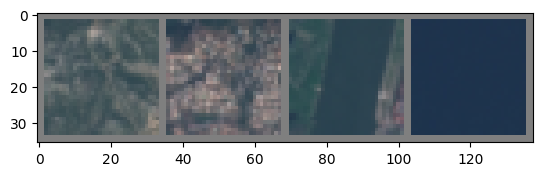

Predicted: Residential Residential River SeaLake
Actual:    HerbaceousVegetation Residential River SeaLake
[4,  2800] loss: 0.475


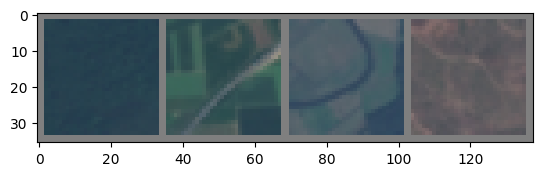

Predicted: Forest Highway Highway HerbaceousVegetation
Actual:    Forest Highway River HerbaceousVegetation
[4,  2900] loss: 0.438


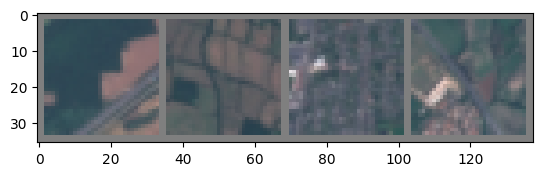

Predicted: River Pasture Residential Highway
Actual:    Highway Pasture Residential Highway
[4,  3000] loss: 0.442


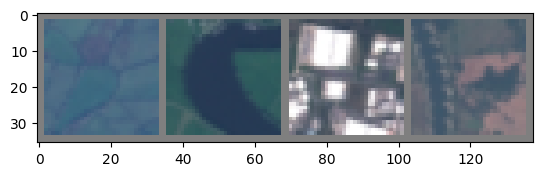

Predicted: Pasture River Industrial Highway
Actual:    Pasture River Industrial River
[4,  3100] loss: 0.450


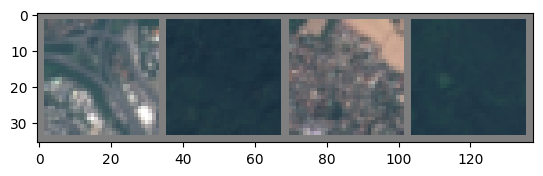

Predicted: Industrial Forest Residential Forest
Actual:    Highway Forest Residential Forest
[4,  3200] loss: 0.461


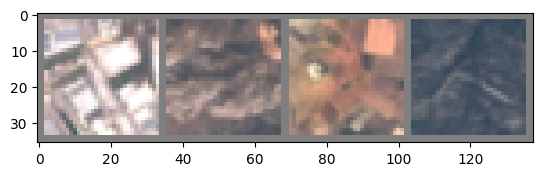

Predicted: Industrial HerbaceousVegetation PermanentCrop Residential
Actual:    Industrial HerbaceousVegetation PermanentCrop HerbaceousVegetation
[4,  3300] loss: 0.411


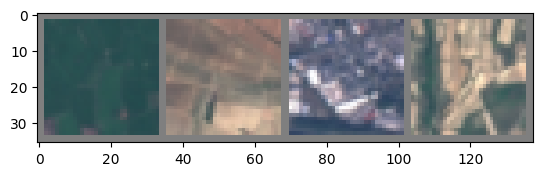

Predicted: Forest PermanentCrop Industrial AnnualCrop
Actual:    Pasture PermanentCrop Industrial PermanentCrop
[4,  3400] loss: 0.378


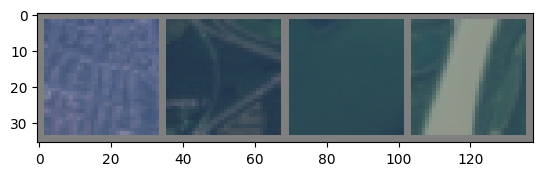

Predicted: Residential River SeaLake AnnualCrop
Actual:    Residential Highway SeaLake River
[4,  3500] loss: 0.526


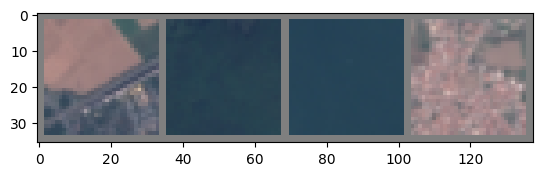

Predicted: Highway Forest SeaLake Residential
Actual:    Highway Forest SeaLake Residential
[4,  3600] loss: 0.395


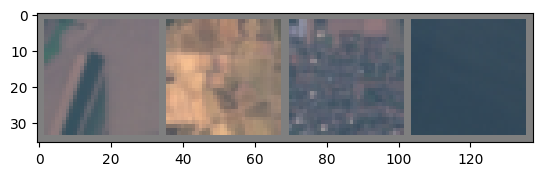

Predicted: AnnualCrop PermanentCrop Residential SeaLake
Actual:    AnnualCrop PermanentCrop Residential SeaLake
[5,   100] loss: 0.411


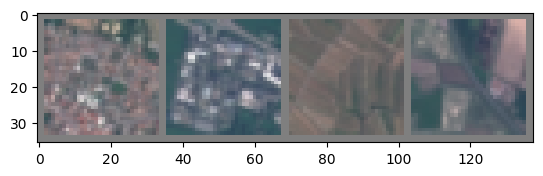

Predicted: Residential Industrial HerbaceousVegetation Highway
Actual:    Residential Industrial PermanentCrop Highway
[5,   200] loss: 0.385


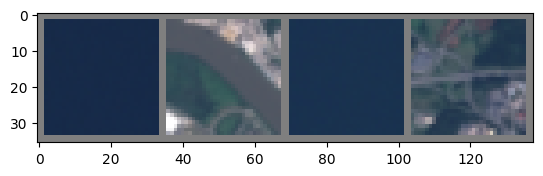

Predicted: SeaLake Highway SeaLake Highway
Actual:    SeaLake River SeaLake Highway
[5,   300] loss: 0.331


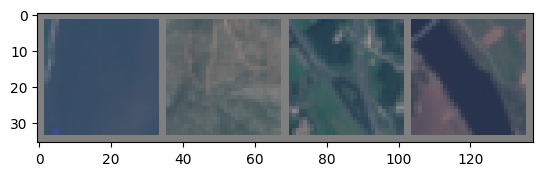

Predicted: SeaLake PermanentCrop Highway River
Actual:    SeaLake HerbaceousVegetation Highway River
[5,   400] loss: 0.357


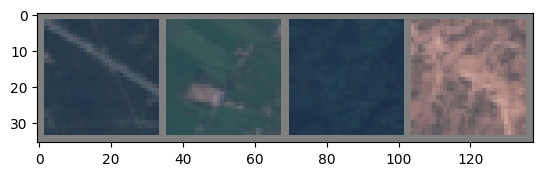

Predicted: Highway AnnualCrop SeaLake HerbaceousVegetation
Actual:    Highway Pasture Forest HerbaceousVegetation
[5,   500] loss: 0.362


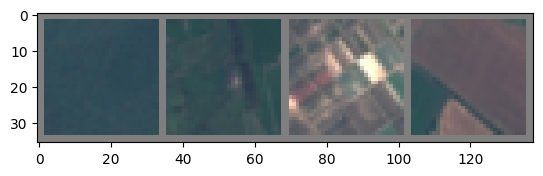

Predicted: Forest Pasture PermanentCrop AnnualCrop
Actual:    Forest Pasture PermanentCrop AnnualCrop
[5,   600] loss: 0.376


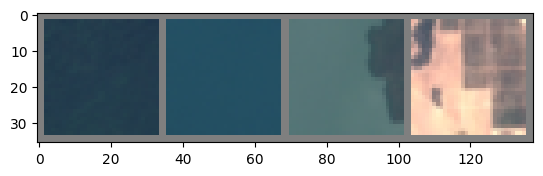

Predicted: Forest SeaLake SeaLake PermanentCrop
Actual:    Forest SeaLake SeaLake PermanentCrop
[5,   700] loss: 0.380


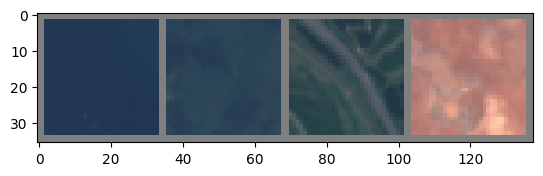

Predicted: SeaLake SeaLake Highway AnnualCrop
Actual:    SeaLake Forest Highway HerbaceousVegetation
[5,   800] loss: 0.378


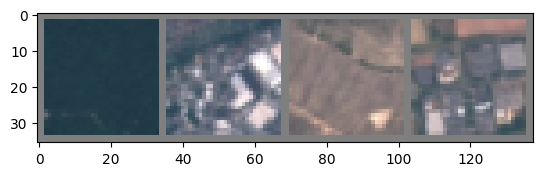

Predicted: Forest Industrial PermanentCrop Industrial
Actual:    Forest Industrial HerbaceousVegetation Industrial
[5,   900] loss: 0.317


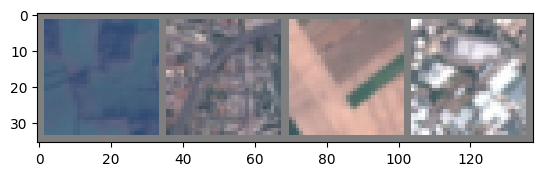

Predicted: Pasture Residential AnnualCrop Industrial
Actual:    Pasture Highway AnnualCrop Industrial
[5,  1000] loss: 0.340


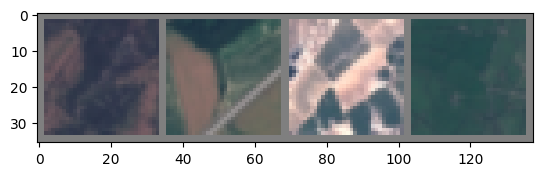

Predicted: HerbaceousVegetation Highway PermanentCrop Pasture
Actual:    HerbaceousVegetation Highway PermanentCrop Pasture
[5,  1100] loss: 0.401


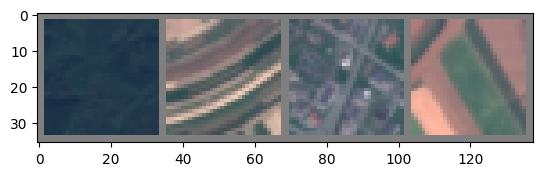

Predicted: Forest HerbaceousVegetation Residential AnnualCrop
Actual:    Forest AnnualCrop Highway AnnualCrop
[5,  1200] loss: 0.447


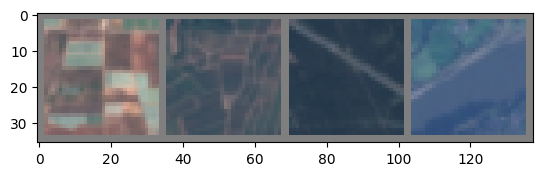

Predicted: PermanentCrop Residential Highway Pasture
Actual:    PermanentCrop PermanentCrop Highway River
[5,  1300] loss: 0.332


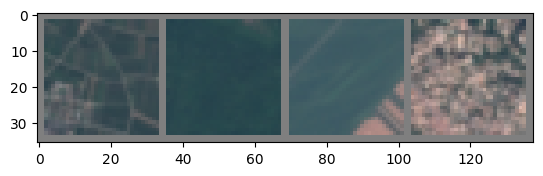

Predicted: HerbaceousVegetation Forest AnnualCrop Residential
Actual:    PermanentCrop Forest AnnualCrop Residential
[5,  1400] loss: 0.370


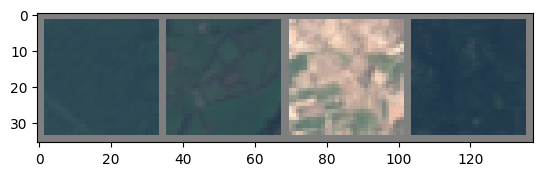

Predicted: SeaLake Forest PermanentCrop Forest
Actual:    Forest Pasture PermanentCrop Forest
[5,  1500] loss: 0.388


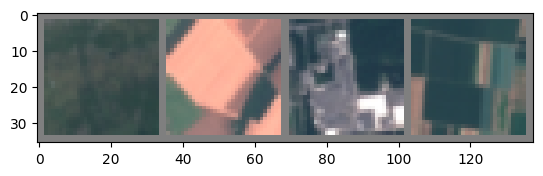

Predicted: HerbaceousVegetation AnnualCrop Industrial River
Actual:    HerbaceousVegetation AnnualCrop Industrial AnnualCrop
[5,  1600] loss: 0.326


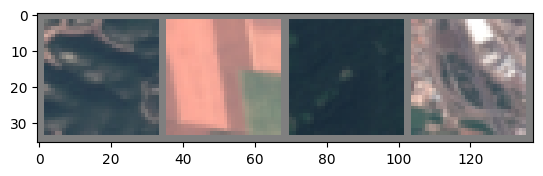

Predicted: Highway AnnualCrop Forest Highway
Actual:    HerbaceousVegetation AnnualCrop Forest Highway
[5,  1700] loss: 0.436


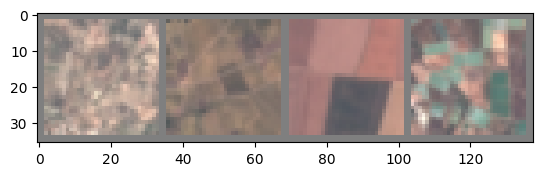

Predicted: PermanentCrop PermanentCrop AnnualCrop PermanentCrop
Actual:    PermanentCrop PermanentCrop AnnualCrop PermanentCrop
[5,  1800] loss: 0.384


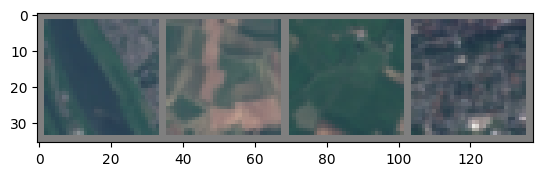

Predicted: River PermanentCrop Pasture Residential
Actual:    River PermanentCrop Pasture Residential
[5,  1900] loss: 0.341


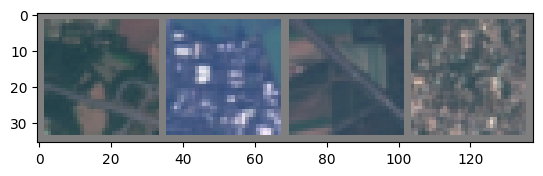

Predicted: Highway Industrial PermanentCrop Residential
Actual:    Highway Industrial Highway Residential
[5,  2000] loss: 0.365


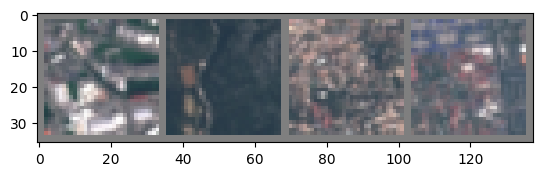

Predicted: Industrial Residential Residential Industrial
Actual:    Industrial HerbaceousVegetation Residential Residential
[5,  2100] loss: 0.292


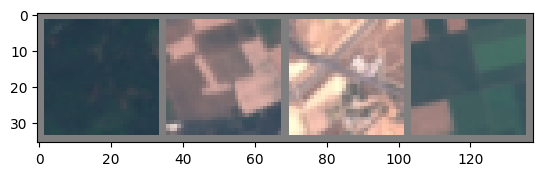

Predicted: Forest PermanentCrop PermanentCrop AnnualCrop
Actual:    Forest PermanentCrop Highway AnnualCrop
[5,  2200] loss: 0.441


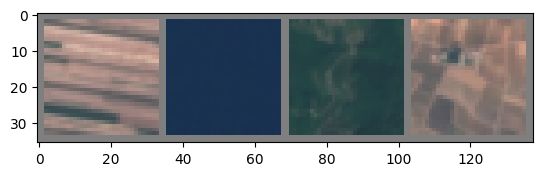

Predicted: PermanentCrop SeaLake Forest PermanentCrop
Actual:    AnnualCrop SeaLake Forest PermanentCrop
[5,  2300] loss: 0.435


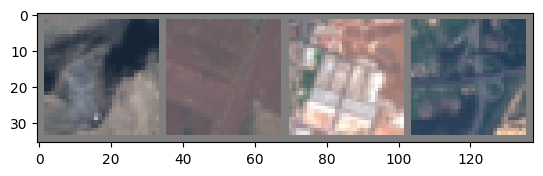

Predicted: HerbaceousVegetation HerbaceousVegetation Industrial Highway
Actual:    HerbaceousVegetation AnnualCrop Industrial Highway
[5,  2400] loss: 0.312


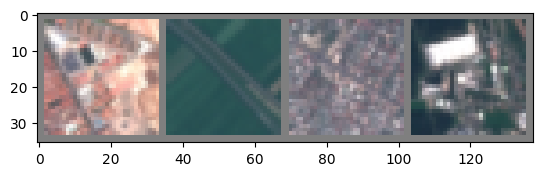

Predicted: Industrial Pasture Residential Industrial
Actual:    Industrial Highway Residential Industrial
[5,  2500] loss: 0.342


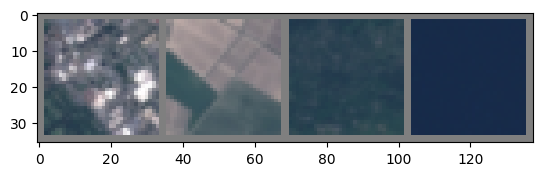

Predicted: Industrial AnnualCrop Forest SeaLake
Actual:    Industrial AnnualCrop Forest SeaLake
[5,  2600] loss: 0.331


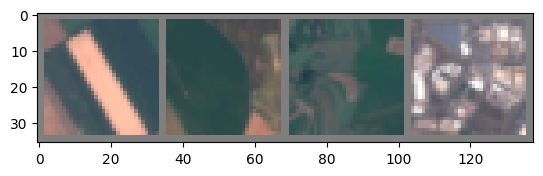

Predicted: AnnualCrop AnnualCrop Pasture Industrial
Actual:    AnnualCrop AnnualCrop Pasture Industrial
[5,  2700] loss: 0.339


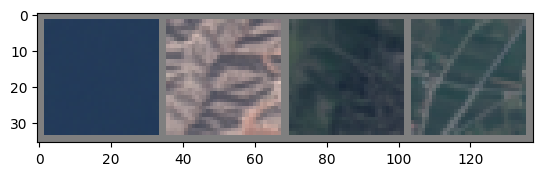

Predicted: SeaLake HerbaceousVegetation HerbaceousVegetation Highway
Actual:    SeaLake HerbaceousVegetation HerbaceousVegetation Highway
[5,  2800] loss: 0.390


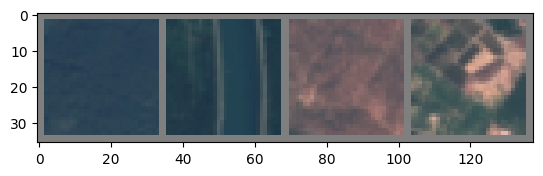

Predicted: Forest River PermanentCrop PermanentCrop
Actual:    Forest River HerbaceousVegetation PermanentCrop
[5,  2900] loss: 0.394


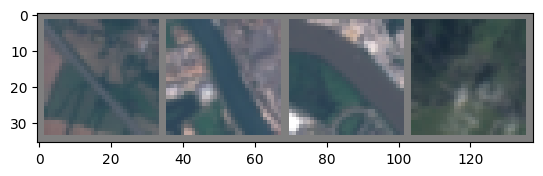

Predicted: Highway River River HerbaceousVegetation
Actual:    Highway River River HerbaceousVegetation
[5,  3000] loss: 0.344


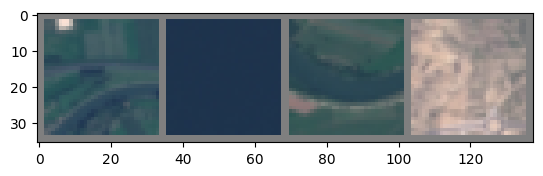

Predicted: River SeaLake River HerbaceousVegetation
Actual:    River SeaLake River HerbaceousVegetation
[5,  3100] loss: 0.429


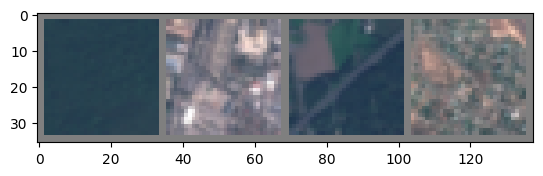

Predicted: Forest Industrial River Residential
Actual:    Forest Industrial Highway Residential
[5,  3200] loss: 0.422


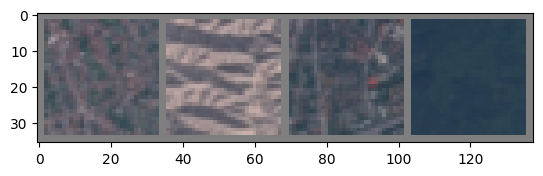

Predicted: Residential HerbaceousVegetation Residential Forest
Actual:    Residential HerbaceousVegetation Residential Forest
[5,  3300] loss: 0.406


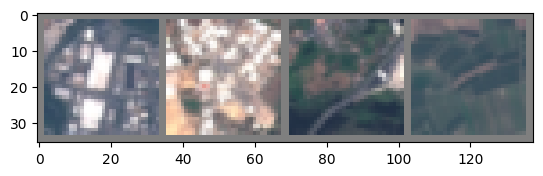

Predicted: Industrial Industrial Highway PermanentCrop
Actual:    Industrial Industrial Highway PermanentCrop
[5,  3400] loss: 0.310


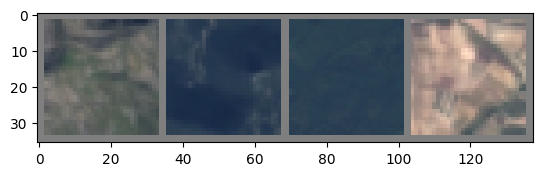

Predicted: HerbaceousVegetation River Forest PermanentCrop
Actual:    HerbaceousVegetation HerbaceousVegetation Forest PermanentCrop
[5,  3500] loss: 0.373


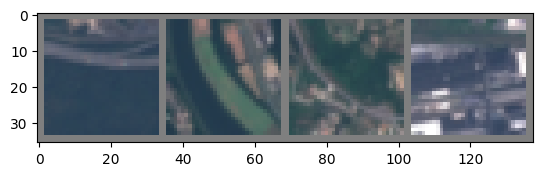

Predicted: River River Highway Industrial
Actual:    Highway River Highway Industrial
[5,  3600] loss: 0.382


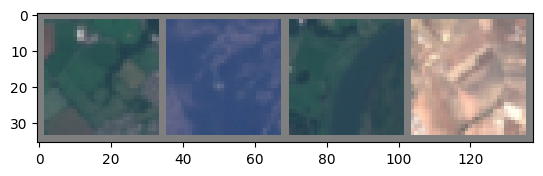

Predicted: River Residential River PermanentCrop
Actual:    Pasture HerbaceousVegetation River PermanentCrop
Finished Training


In [18]:
import random

test_dataset_list = list(test_dataset)

num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99: 
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

            with torch.no_grad():
                sample_indices = random.sample(range(len(test_dataset_list)), 4)
                test_images = torch.stack([test_dataset_list[i][0] for i in sample_indices]).to(device)
                test_labels = torch.tensor([test_dataset_list[i][1] for i in sample_indices]).to(device)

                test_outputs = net(test_images)
                _, predicted = torch.max(test_outputs, 1)

                imshow(torchvision.utils.make_grid(test_images.cpu()))
                
                print('Predicted:', ' '.join(f'{dataset.classes[predicted[j]]}' for j in range(len(predicted))))
                print('Actual:   ', ' '.join(f'{dataset.classes[test_labels[j]]}' for j in range(len(test_labels))))
                
                plt.show()

print('Finished Training')

Accuracy on the test set: 82.19%


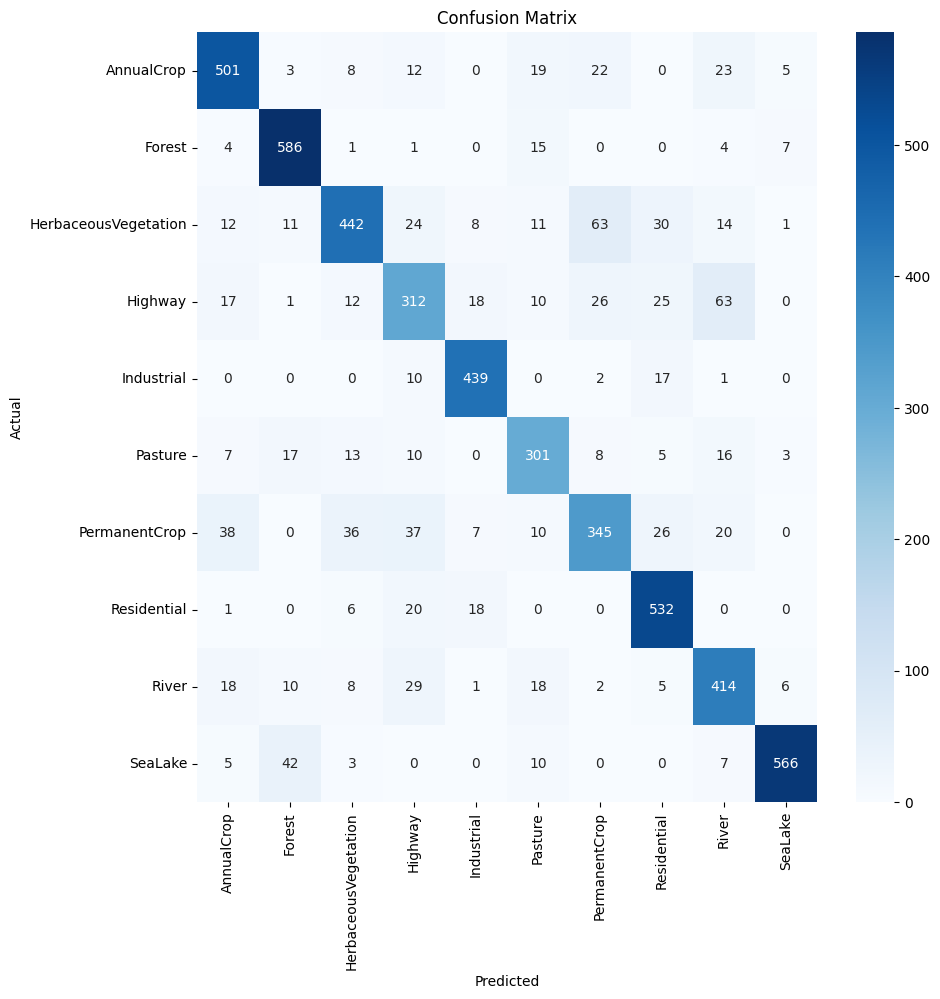

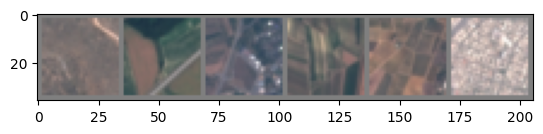

Predicted:  PermanentCrop Highway Industrial PermanentCrop PermanentCrop Residential
Actual:     HerbaceousVegetation Highway Highway PermanentCrop PermanentCrop Residential


In [19]:
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{dataset.classes[predicted[j]]}' for j in range(batch_size)))
print('Actual:    ', ' '.join(f'{dataset.classes[labels[j]]}' for j in range(batch_size)))

Our model performs pretty good with an accuracy score of 82.19%, and our confusion matrix can also indicate that our model is pretty good at prediction the right category, with limmited errors. 

We also show an example of how our model do with predicted categories vs actual.